In [6]:
library ('dplyr')

library ('magrittr')

library ('ggplot2')

library ('tidyverse')

library('finalfit')

library('Hmisc')

library('pastecs')

library('psych')

library('corrplot')

library("DiscriMiner")

library('base')

library('reshape2')

library('resample')

library('dendextend')

library('fpc')

library('dbscan')

# **Exploratory Analysis on smartphone users data** #

## *#First load the data and explore the attributes we are working on* ##

In [7]:
raw <- read.csv('/Users/tonychu/SynologyDrive/School | Study/University of Bath/07. Data Mining/Week 8/dataset.csv')
head(raw)

Smartphone Gender Age Honesty.Humility Emotionality Extraversion
1 iPhone     male   24  3.3              2.4          3.3         
2 iPhone     male   39  3.5              2.6          4.3         
3 iPhone     male   31  3.9              2.4          2.7         
4 iPhone     male   22  3.0              3.0          2.8         
5 iPhone     male   43  3.6              1.8          2.0         
6 iPhone     male   23  2.6              4.0          3.0         
  Agreeableness Conscientiousness Openness Avoidance.Similarity
1 3.4           3.1               3.3      1                   
2 4.0           3.2               4.5      1                   
3 4.1           3.7               4.9      3                   
4 2.4           2.2               2.5      2                   
5 2.6           3.9               3.1      3                   
6 2.4           3.9               3.8      2                   
  Phone.as.status.object Social.Economic.Status Time.owned.current.phone
1 1.8                    6                      18                      
2 2.0                    7                       2                      
3 1.3                    2                      22                      
4 2.7                    4                       2                      
5 1.2                    3                       4                      
6 1.7                    6                      23

### # Other than "Smartphone" and "Gender" that are categorical value, rest of the attributes are numerical values

## *# With summary() and describe(), now we get the descriptive Statistics of each attributes (Min, Media, Max, and quantiles)* ##

In [8]:
summary(raw)

  Smartphone           Gender               Age        Honesty.Humility
 Length:529         Length:529         Min.   :16.00   Min.   :1.700   
 Class :character   Class :character   1st Qu.:19.00   1st Qu.:3.000   
 Mode  :character   Mode  :character   Median :23.00   Median :3.500   
                                       Mean   :28.74   Mean   :3.454   
                                       3rd Qu.:35.00   3rd Qu.:3.900   
                                       Max.   :74.00   Max.   :4.900   
  Emotionality    Extraversion  Agreeableness   Conscientiousness
 Min.   :1.100   Min.   :1.40   Min.   :1.400   Min.   :1.500    
 1st Qu.:2.900   1st Qu.:2.90   1st Qu.:2.700   1st Qu.:3.200    
 Median :3.400   Median :3.30   Median :3.200   Median :3.600    
 Mean   :3.363   Mean   :3.25   Mean   :3.145   Mean   :3.562    
 3rd Qu.:3.800   3rd Qu.:3.70   3rd Qu.:3.600   3rd Qu.:4.000    
 Max.   :5.000   Max.   :4.70   Max.   :4.700   Max.   :5.000    
    Openness     Avoidance.Similar

In [9]:
describe(raw)

vars n   mean      sd         median trimmed  
Smartphone*               1   529  1.586011  0.4930127  2.0    1.607059
Gender*                   2   529  1.321361  0.4674411  1.0    1.277647
Age                       3   529 28.742911 12.9482534 23.0   26.578824
Honesty.Humility          4   529  3.453875  0.6260968  3.5    3.464000
Emotionality              5   529  3.363138  0.6958089  3.4    3.382824
Extraversion              6   529  3.250473  0.6573915  3.3    3.277647
Agreeableness             7   529  3.144991  0.6191839  3.2    3.160471
Conscientiousness         8   529  3.561626  0.6062037  3.6    3.591529
Openness                  9   529  3.468431  0.6247769  3.5    3.480706
Avoidance.Similarity     10   529  2.405293  0.8336270  2.3    2.378824
Phone.as.status.object   11   529  2.255955  0.5935316  2.2    2.252471
Social.Economic.Status   12   529  5.986767  1.5268477  6.0    6.049412
Time.owned.current.phone 13   529 12.111531  9.9818414 11.0   10.943529
                         mad      min  max  range skew        kurtosis  
Smartphone*               0.00000  1.0  2.0  1.0  -0.34826182 -1.8822611
Gender*                   0.00000  1.0  2.0  1.0   0.76288222 -1.4206856
Age                       5.93040 16.0 74.0 58.0   1.28415991  0.6563716
Honesty.Humility          0.59304  1.7  4.9  3.2  -0.15503267 -0.3129943
Emotionality              0.74130  1.1  5.0  3.9  -0.28670690 -0.2228154
Extraversion              0.59304  1.4  4.7  3.3  -0.37816331 -0.2338925
Agreeableness             0.59304  1.4  4.7  3.3  -0.22069402 -0.4015261
Conscientiousness         0.59304  1.5  5.0  3.5  -0.49294970  0.3018512
Openness                  0.59304  1.6  4.9  3.3  -0.19778742 -0.3516343
Avoidance.Similarity      0.74130  1.0  5.0  4.0   0.50470693  0.3182027
Phone.as.status.object    0.74130  1.0  3.8  2.8   0.08842032 -0.6119792
Social.Economic.Status    1.48260  1.0 10.0  9.0  -0.40793839  0.2309683
Time.owned.current.phone 10.37820  0.0 99.0 99.0   2.05563503 10.8107704
                         se        
Smartphone*              0.02143533
Gender*                  0.02032353
Age                      0.56296754
Honesty.Humility         0.02722160
Emotionality             0.03025256
Extraversion             0.02858224
Agreeableness            0.02692104
Conscientiousness        0.02635668
Openness                 0.02716421
Avoidance.Similarity     0.03624465
Phone.as.status.object   0.02580572
Social.Economic.Status   0.06638468
Time.owned.current.phone 0.43399311

## *# With missing_plot() function, we've confirmed that there's no missing value in this dataset* ##

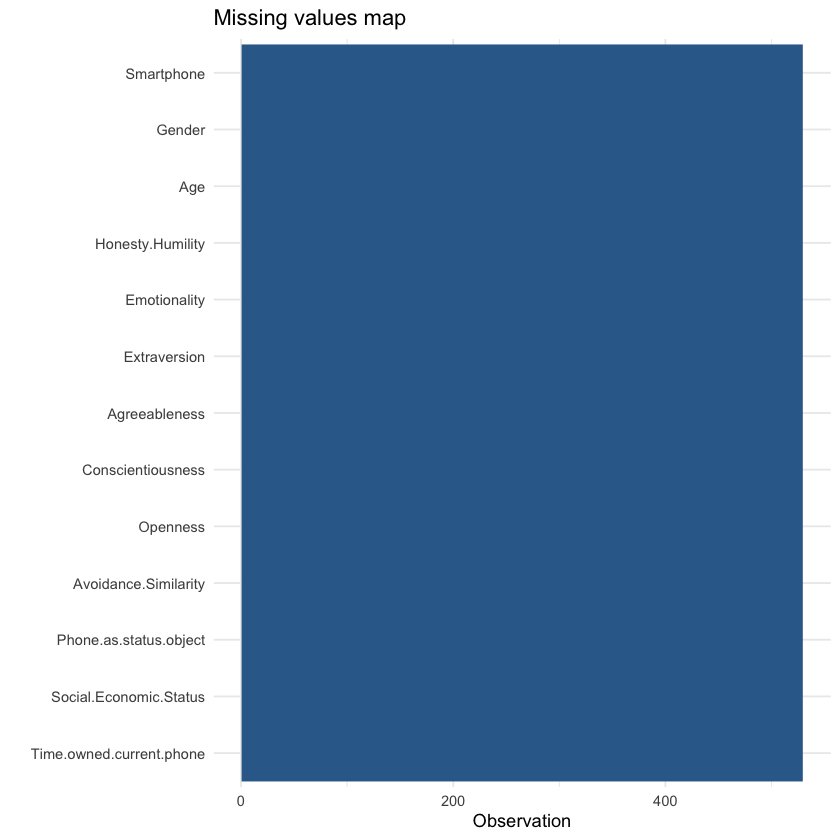

In [10]:
raw %>% missing_plot()

## *# Create dummy variables for non-numeric values* ## 

In [11]:
raw_dummy <- raw

In [12]:
# Smartphone and Gender are dichotomous variables, so using 1, 0 as dummy variables
# Iphone = 1, Androd = 0 | Male = 1, Female = 0

raw_dummy$gender_dummy <- ifelse(raw_dummy$Gender == 'male', 1,0)
raw_dummy$smartphone_dummy <- ifelse(raw_dummy$Smartphone == 'iPhone', 1, 0)
head(raw_dummy)

Smartphone Gender Age Honesty.Humility Emotionality Extraversion
1 iPhone     male   24  3.3              2.4          3.3         
2 iPhone     male   39  3.5              2.6          4.3         
3 iPhone     male   31  3.9              2.4          2.7         
4 iPhone     male   22  3.0              3.0          2.8         
5 iPhone     male   43  3.6              1.8          2.0         
6 iPhone     male   23  2.6              4.0          3.0         
  Agreeableness Conscientiousness Openness Avoidance.Similarity
1 3.4           3.1               3.3      1                   
2 4.0           3.2               4.5      1                   
3 4.1           3.7               4.9      3                   
4 2.4           2.2               2.5      2                   
5 2.6           3.9               3.1      3                   
6 2.4           3.9               3.8      2                   
  Phone.as.status.object Social.Economic.Status Time.owned.current.phone
1 1.8                    6                      18                      
2 2.0                    7                       2                      
3 1.3                    2                      22                      
4 2.7                    4                       2                      
5 1.2                    3                       4                      
6 1.7                    6                      23                      
  gender_dummy smartphone_dummy
1 1            1               
2 1            1               
3 1            1               
4 1            1               
5 1            1               
6 1            1

In [13]:
raw_dummy <- subset(raw_dummy, select = -c(1,2))
raw_dummy <- raw_dummy[, c(12,13,1:11)]
head(raw_dummy)

gender_dummy smartphone_dummy Age Honesty.Humility Emotionality Extraversion
1 1            1                24  3.3              2.4          3.3         
2 1            1                39  3.5              2.6          4.3         
3 1            1                31  3.9              2.4          2.7         
4 1            1                22  3.0              3.0          2.8         
5 1            1                43  3.6              1.8          2.0         
6 1            1                23  2.6              4.0          3.0         
  Agreeableness Conscientiousness Openness Avoidance.Similarity
1 3.4           3.1               3.3      1                   
2 4.0           3.2               4.5      1                   
3 4.1           3.7               4.9      3                   
4 2.4           2.2               2.5      2                   
5 2.6           3.9               3.1      3                   
6 2.4           3.9               3.8      2                   
  Phone.as.status.object Social.Economic.Status Time.owned.current.phone
1 1.8                    6                      18                      
2 2.0                    7                       2                      
3 1.3                    2                      22                      
4 2.7                    4                       2                      
5 1.2                    3                       4                      
6 1.7                    6                      23

## *# Examine and Remove Outliers* ##

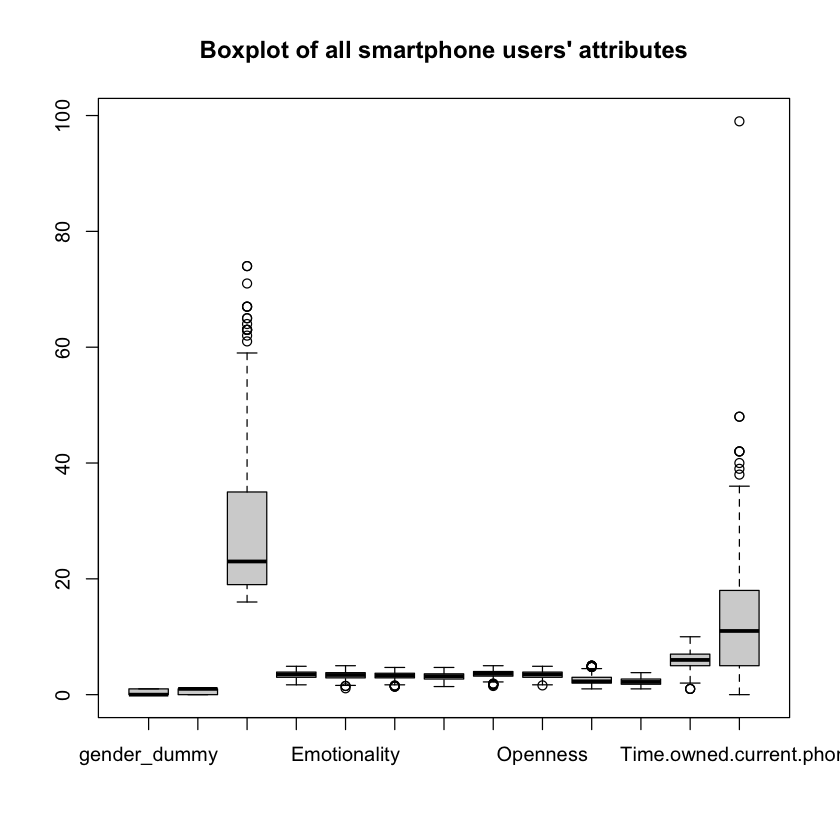

In [14]:
boxplot(raw_dummy, main="Boxplot of all smartphone users' attributes")

In [15]:
outliers <- function(x) {

  Q1 <- quantile(x, probs=.25)
  Q3 <- quantile(x, probs=.75)
  iqr = Q3-Q1

 upper_limit = Q3 + (iqr*1.5)
 lower_limit = Q1 - (iqr*1.5)

 x > upper_limit | x < lower_limit
}

remove_outliers <- function(df, cols = names(df)) {
  for (col in cols) {
    df <- df[!outliers(df[[col]]),]
  }
  df
}

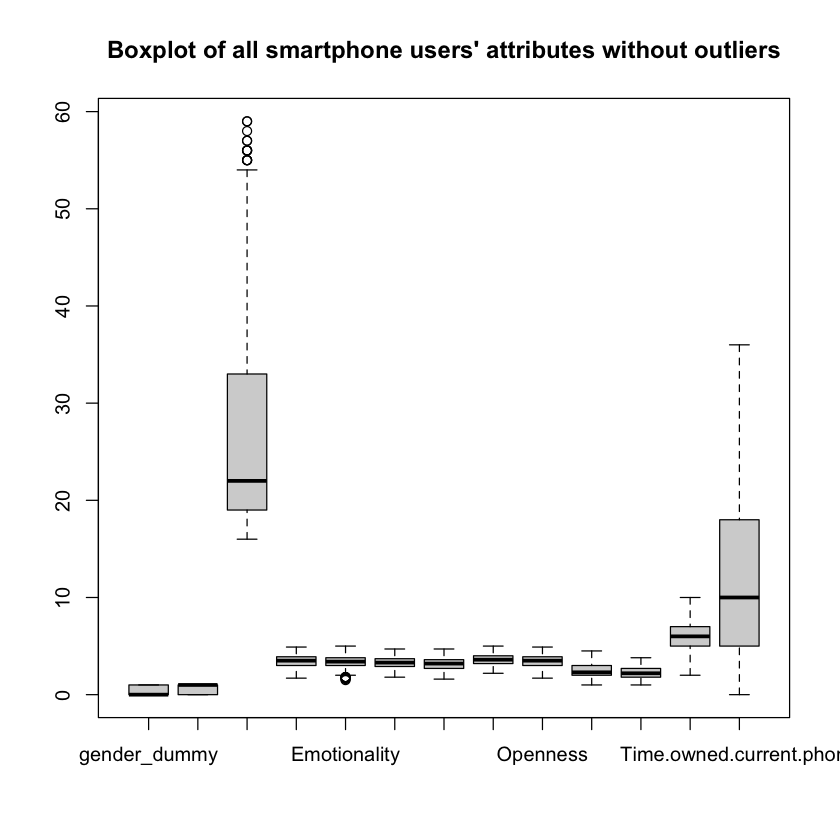

In [16]:
raw_no_outliers <- remove_outliers(raw_dummy, names(raw_dummy))
boxplot(raw_no_outliers, main="Boxplot of all smartphone users' attributes without outliers")

In [17]:
describe(raw_no_outliers)

vars n   mean       sd         median trimmed   
gender_dummy              1   477  0.3249476  0.4688470  0.0    0.2819843
smartphone_dummy          2   477  0.6058700  0.4891760  1.0    0.6318538
Age                       3   477 27.6415094 11.4925714 22.0   25.7676240
Honesty.Humility          4   477  3.4589099  0.6242889  3.5    3.4671018
Emotionality              5   477  3.3937107  0.6699133  3.4    3.4070496
Extraversion              6   477  3.2547170  0.6238635  3.3    3.2731070
Agreeableness             7   477  3.1651992  0.6172627  3.2    3.1770235
Conscientiousness         8   477  3.5899371  0.5666719  3.6    3.6062663
Openness                  9   477  3.4417191  0.6068236  3.5    3.4571802
Avoidance.Similarity     10   477  2.3750524  0.7504524  2.3    2.3725849
Phone.as.status.object   11   477  2.2754717  0.5836408  2.2    2.2733681
Social.Economic.Status   12   477  6.0000000  1.4450728  6.0    6.0496084
Time.owned.current.phone 13   477 11.5660377  8.5347990 10.0   10.8015666
                         mad     min  max  range skew        kurtosis   
gender_dummy             0.00000  0.0  1.0  1.0   0.74517032 -1.44774312
smartphone_dummy         0.00000  0.0  1.0  1.0  -0.43194295 -1.81722180
Age                      5.93040 16.0 59.0 43.0   1.17204712  0.05705582
Honesty.Humility         0.59304  1.7  4.9  3.2  -0.12711259 -0.31154555
Emotionality             0.59304  1.5  5.0  3.5  -0.22597922 -0.29749382
Extraversion             0.59304  1.8  4.7  2.9  -0.23664163 -0.49479287
Agreeableness            0.59304  1.6  4.7  3.1  -0.15946405 -0.53366453
Conscientiousness        0.59304  2.2  5.0  2.8  -0.23149099 -0.27493462
Openness                 0.59304  1.7  4.9  3.2  -0.23692461 -0.41774747
Avoidance.Similarity     0.74130  1.0  4.5  3.5   0.18378952 -0.32212895
Phone.as.status.object   0.74130  1.0  3.8  2.8   0.07157195 -0.60247462
Social.Economic.Status   1.48260  2.0 10.0  8.0  -0.34180434  0.03932575
Time.owned.current.phone 8.89560  0.0 36.0 36.0   0.78331594  0.11599635
                         se        
gender_dummy             0.02146703
smartphone_dummy         0.02239783
Age                      0.52620870
Honesty.Humility         0.02858422
Emotionality             0.03067322
Extraversion             0.02856475
Agreeableness            0.02826252
Conscientiousness        0.02594612
Openness                 0.02778454
Avoidance.Similarity     0.03436086
Phone.as.status.object   0.02672308
Social.Economic.Status   0.06616534
Time.owned.current.phone 0.39078160

In [18]:
raw_no_outliers$age_group <- cut(raw_no_outliers$Age, breaks = c(10,20, 30,40,50,60,70,80), labels = c("10-20","20-30","31-40","41-50","51-60","61-70","71-80"), right = TRUE)
head(raw_no_outliers)

gender_dummy smartphone_dummy Age Honesty.Humility Emotionality Extraversion
1 1            1                24  3.3              2.4          3.3         
2 1            1                39  3.5              2.6          4.3         
3 1            1                31  3.9              2.4          2.7         
4 1            1                22  3.0              3.0          2.8         
5 1            1                43  3.6              1.8          2.0         
6 1            1                23  2.6              4.0          3.0         
  Agreeableness Conscientiousness Openness Avoidance.Similarity
1 3.4           3.1               3.3      1                   
2 4.0           3.2               4.5      1                   
3 4.1           3.7               4.9      3                   
4 2.4           2.2               2.5      2                   
5 2.6           3.9               3.1      3                   
6 2.4           3.9               3.8      2                   
  Phone.as.status.object Social.Economic.Status Time.owned.current.phone
1 1.8                    6                      18                      
2 2.0                    7                       2                      
3 1.3                    2                      22                      
4 2.7                    4                       2                      
5 1.2                    3                       4                      
6 1.7                    6                      23                      
  age_group
1 20-30    
2 31-40    
3 31-40    
4 20-30    
5 41-50    
6 20-30

# **Data Visualizations** #

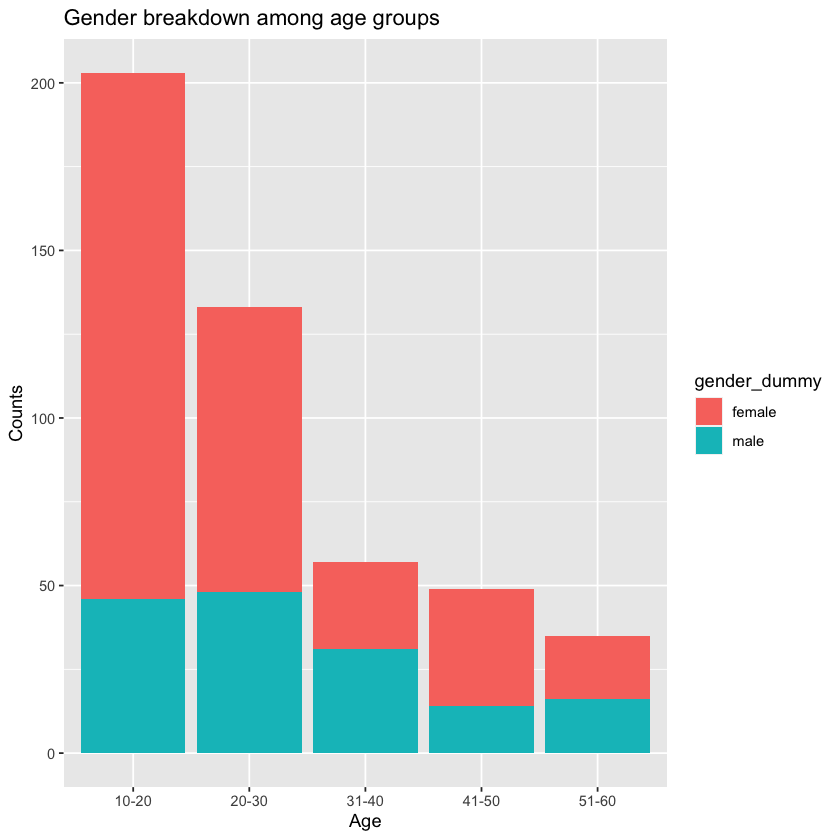

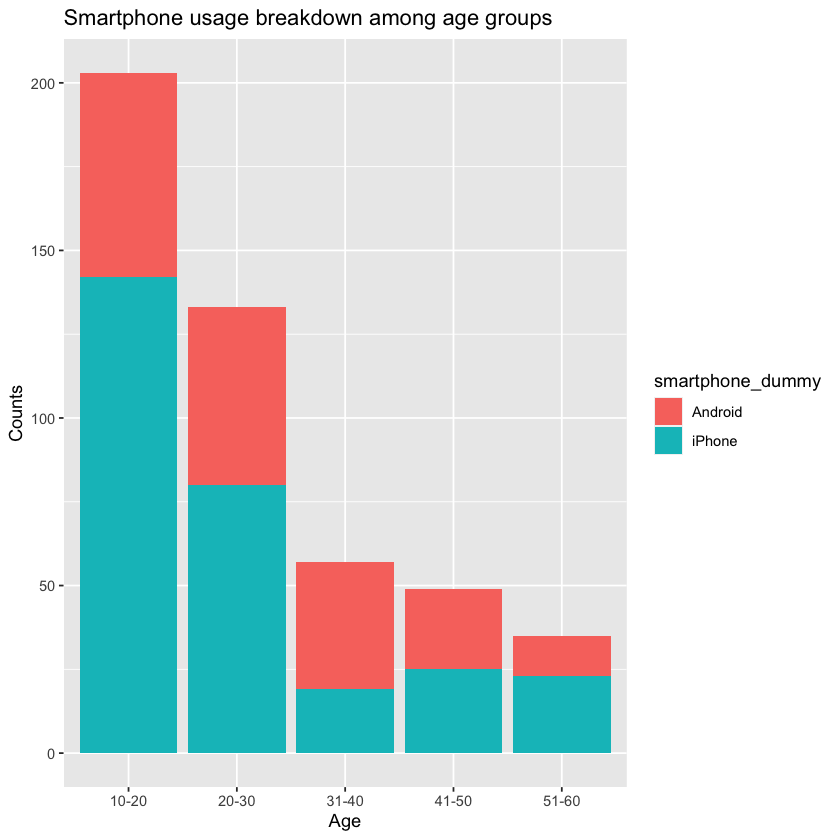

In [19]:
raw_gender_smartphone_breakdown <- raw_no_outliers


raw_gender_smartphone_breakdown$gender_dummy <- ifelse(raw_gender_smartphone_breakdown$gender_dummy == 1, "male","female")
raw_gender_smartphone_breakdown$smartphone_dummy <- ifelse(raw_gender_smartphone_breakdown$smartphone_dummy == 1, "iPhone", "Android")


ggplot(raw_gender_smartphone_breakdown) +
    geom_bar(mapping = aes(x=age_group, fill = gender_dummy)) +
    labs(title = "Gender breakdown among age groups", x = "Age", y = "Counts")

ggplot(raw_gender_smartphone_breakdown) +
    geom_bar(mapping = aes(x=age_group, fill = smartphone_dummy)) +
    labs(title = "Smartphone usage breakdown among age groups", x = "Age", y = "Counts")

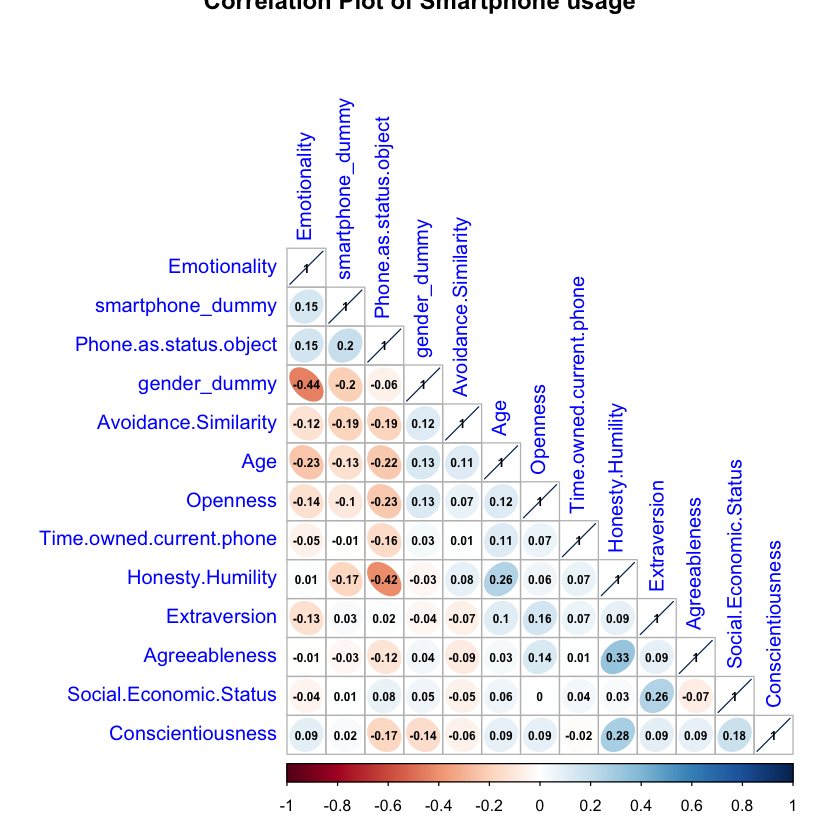

In [20]:
corrplot(cor(subset(raw_no_outliers, select = -c(age_group))), addCoef.col = "black", 
    number.cex = .6, insig = "blank", order = "AOE", method = "ellipse", tl.col = 'blue', 
    title = "Correlation Plot of Smartphone usage", type = "lower")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



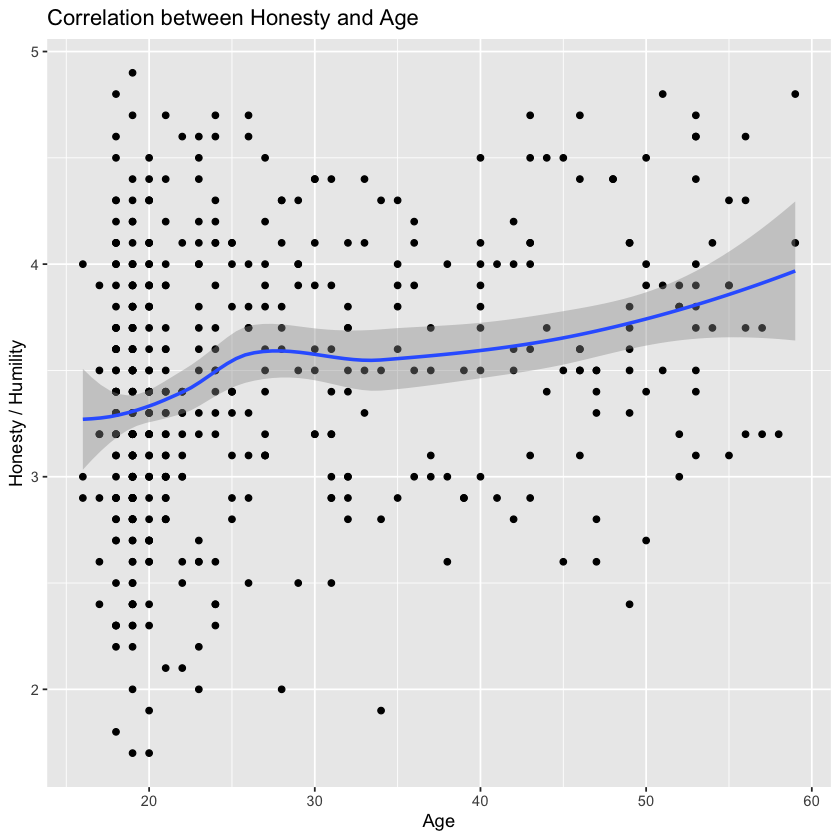

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



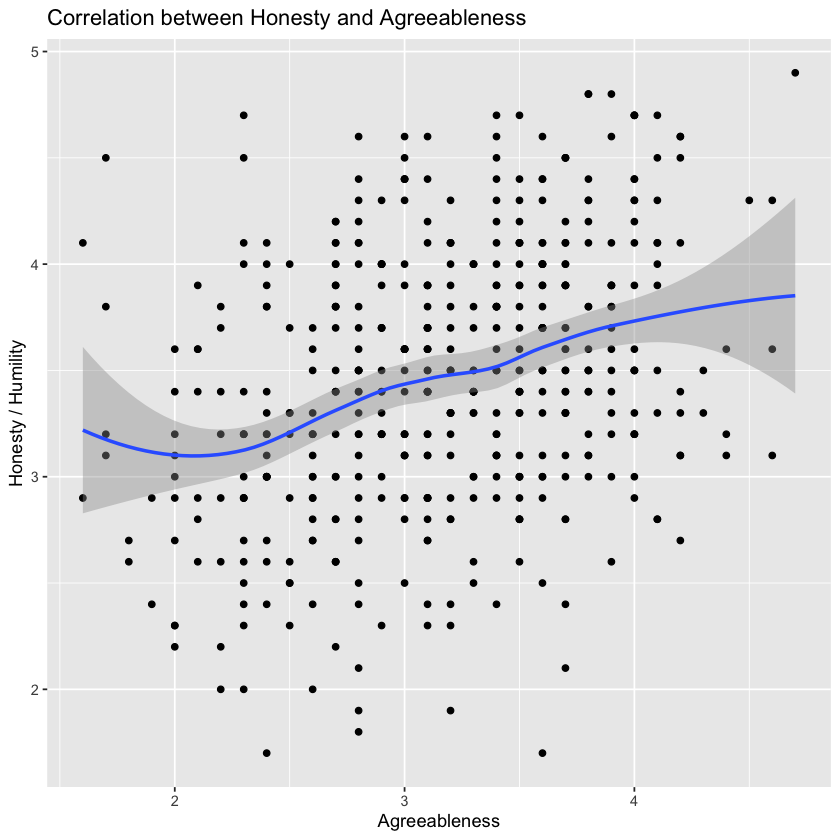

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



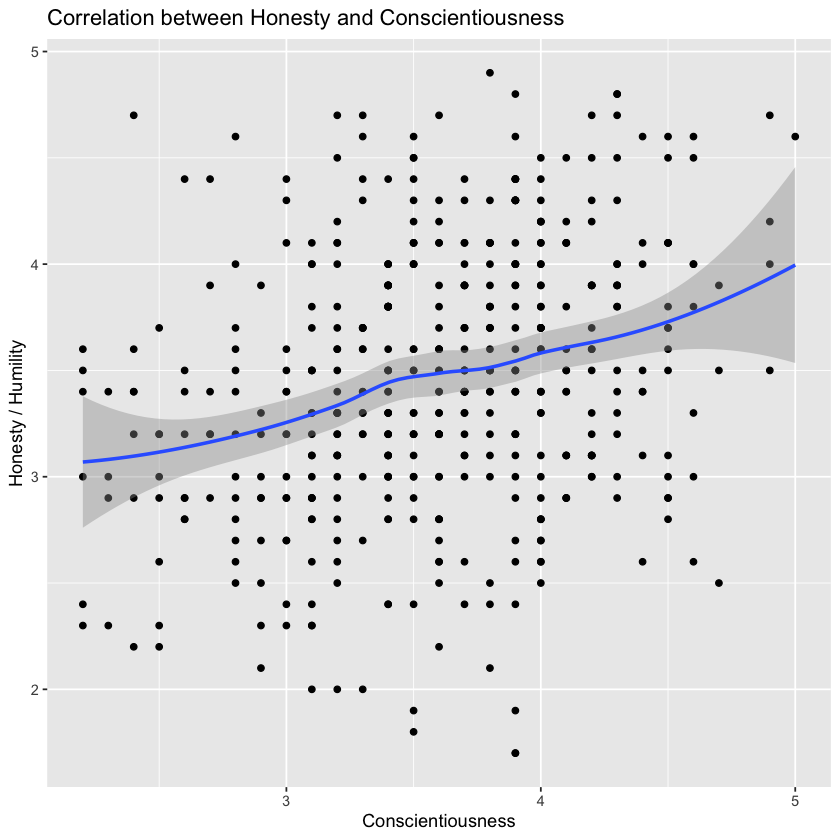

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  6.7324e-30”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.01”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.005”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1.005”
Warning message i

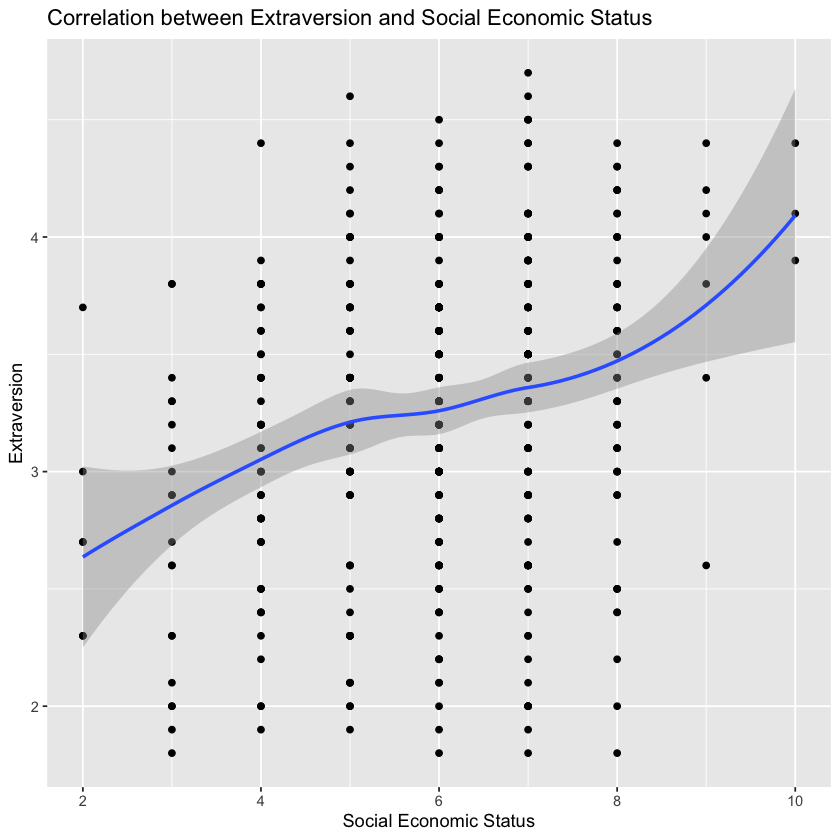

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



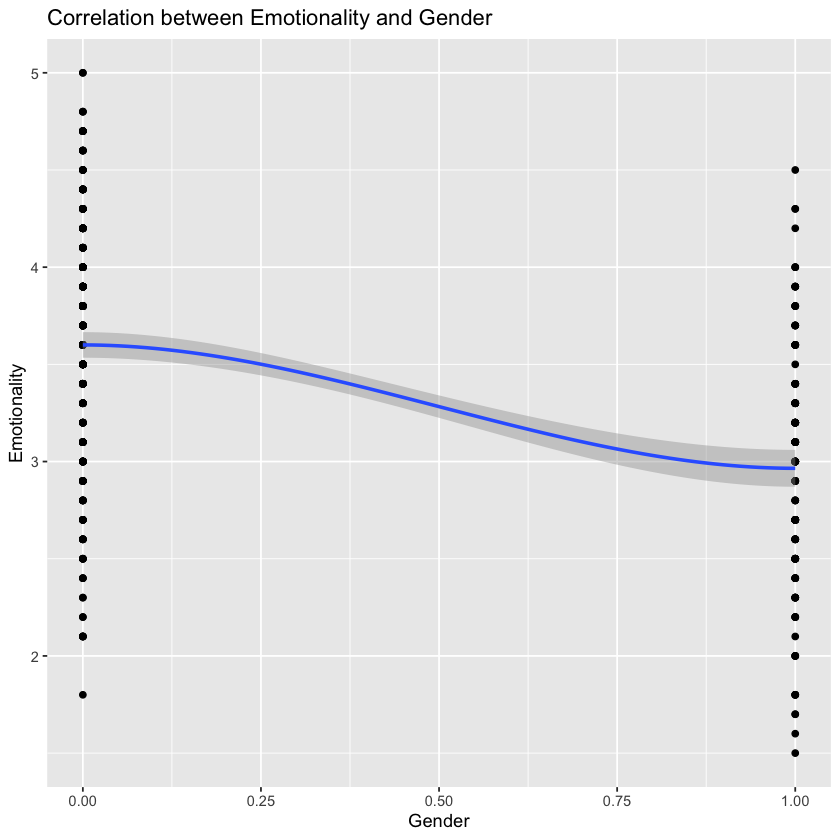

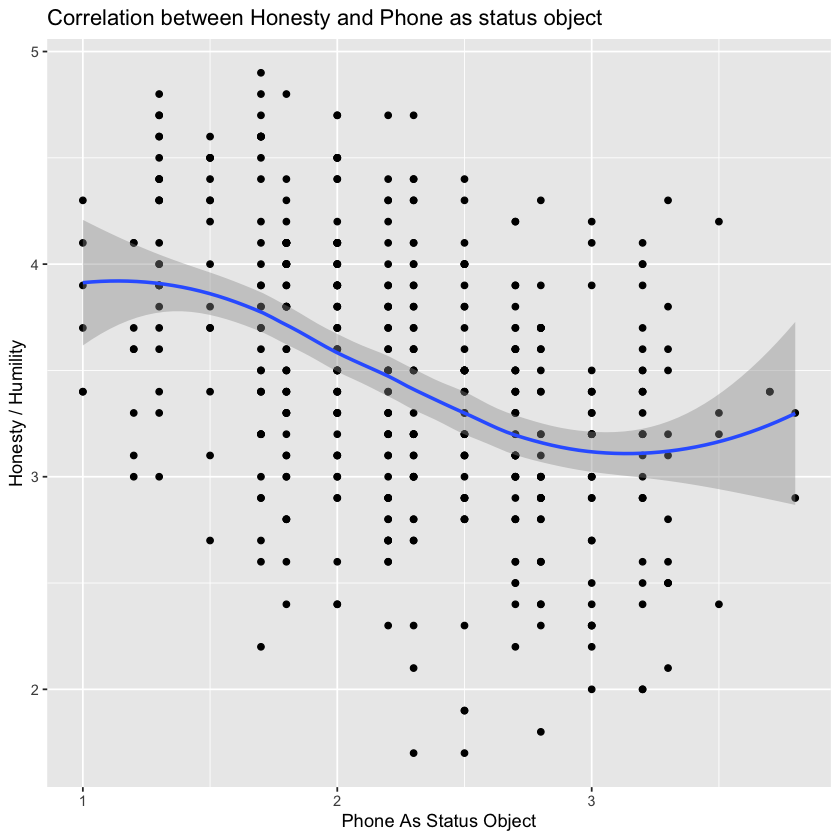

In [21]:
# Positively Correlated

ggplot(raw_no_outliers, mapping = aes(x = Age, y = Honesty.Humility)) + 
  geom_point() +
  geom_smooth(mapping = aes(x = Age, y = Honesty.Humility)) +
  labs(title = "Correlation between Honesty and Age", x = "Age", y = "Honesty / Humility")

ggplot(raw_no_outliers, mapping = aes(x = Agreeableness, y = Honesty.Humility)) + 
  geom_point() +
  geom_smooth(mapping = aes(x = Agreeableness, y = Honesty.Humility)) +
  labs(title = "Correlation between Honesty and Agreeableness", x = "Agreeableness", y = "Honesty / Humility")

ggplot(raw_no_outliers, mapping = aes(x = Conscientiousness, y = Honesty.Humility)) + 
  geom_point() +
  geom_smooth(mapping = aes(x = Conscientiousness, y = Honesty.Humility)) +
  labs(title = "Correlation between Honesty and Conscientiousness", x = "Conscientiousness", y = "Honesty / Humility")

ggplot(raw_no_outliers, mapping = aes(x = Social.Economic.Status, y = Extraversion)) + 
  geom_point() +
  geom_smooth(mapping = aes(x = Social.Economic.Status, y = Extraversion)) +
  labs(title = "Correlation between Extraversion and Social Economic Status", x = "Social Economic Status", y = "Extraversion")


# Negatively Correlated

ggplot(raw_no_outliers, mapping = aes(x = gender_dummy, y = Emotionality)) + 
  geom_point() +
  geom_smooth(mapping = aes(x = gender_dummy, y = Emotionality)) +
  labs(title = "Correlation between Emotionality and Gender", x = "Gender", y = "Emotionality")

ggplot(raw_no_outliers, mapping = aes(x = Phone.as.status.object, y = Honesty.Humility)) + 
  geom_point() +
  geom_smooth(mapping = aes(x = Phone.as.status.object, y = Honesty.Humility)) +
  labs(title = "Correlation between Honesty and Phone as status object", x = "Phone As Status Object", y = "Honesty / Humility")




## *# Smartphone and Gender cohorts' Shapiro normality test (iPhone, Android, Male, and Female)* ##

In [22]:
raw_no_outliers <- subset(raw_no_outliers, select = -c(age_group))

iphone_user_shapiro <- apply(subset(raw_no_outliers[raw_no_outliers$smartphone_dummy==1,], select = -c(gender_dummy,smartphone_dummy)),2, shapiro.test)
android_user_shapiro <- apply(subset(raw_no_outliers[raw_no_outliers$smartphone_dummy==0,], select = -c(gender_dummy,smartphone_dummy)),2, shapiro.test)

male_user_shapiro <- apply(subset(raw_no_outliers[raw_no_outliers$gender_dummy==1,], select = -c(gender_dummy,smartphone_dummy)),2, shapiro.test)
female_user_shapiro <- apply(subset(raw_no_outliers[raw_no_outliers$gender_dummy==0,], select = -c(gender_dummy,smartphone_dummy)),2, shapiro.test)

In [23]:
iphone_user_shapiro


$Age

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.73211, p-value < 2.2e-16


$Honesty.Humility

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.99371, p-value = 0.2715


$Emotionality

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98386, p-value = 0.002427


$Extraversion

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98437, p-value = 0.003062


$Agreeableness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98813, p-value = 0.01798


$Conscientiousness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98484, p-value = 0.00379


$Openness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.991, p-value = 0.07371


$Avoidance.Similarity

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.94272, p-value = 3.642e-09


$Phone.as.status.object

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97601, p-value = 9.017e-05


$Social.Economic.Status

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.9451, p-value = 6.544e-09


$Time.owned.current.p

In [24]:
android_user_shapiro

$Age

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.87229, p-value = 1.607e-11


$Honesty.Humility

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98591, p-value = 0.05691


$Emotionality

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.99279, p-value = 0.483


$Extraversion

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98408, p-value = 0.03141


$Agreeableness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98903, p-value = 0.1573


$Conscientiousness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.99036, p-value = 0.2391


$Openness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98364, p-value = 0.02726


$Avoidance.Similarity

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96319, p-value = 7.747e-05


$Phone.as.status.object

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97482, p-value = 0.001796


$Social.Economic.Status

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.94535, p-value = 1.369e-06


$Time.owned.current.ph

In [25]:
iphone_user_var <- as.data.frame(colVars(raw_no_outliers[raw_no_outliers$smartphone_dummy==1,]))
android_user_var <- as.data.frame(colVars(raw_no_outliers[raw_no_outliers$smartphone_dummy==0,]))
male_user_var <- as.data.frame(colVars(raw_no_outliers[raw_no_outliers$gender_dummy==1,]))
female_user_var <- as.data.frame(colVars(raw_no_outliers[raw_no_outliers$gender_dummy==0,]))

colnames(iphone_user_var) <- "variance"
colnames(android_user_var) <- "variance"
colnames(male_user_var) <- "variance"
colnames(female_user_var) <- "variance"

In [26]:
iphone_user_var

variance   
gender_dummy               0.1877163
smartphone_dummy           0.0000000
Age                      130.4253412
Honesty.Humility           0.3797710
Emotionality               0.4138838
Extraversion               0.3883751
Agreeableness              0.3877828
Conscientiousness          0.3340614
Openness                   0.3767361
Avoidance.Similarity       0.5077290
Phone.as.status.object     0.3618428
Social.Economic.Status     1.9547530
Time.owned.current.phone  69.5147539

In [27]:
## var.test(Honesty.Humility~Gender, data = raw)
## var.test(Emotionality~Gender, data = raw)
var.test(Extraversion~gender_dummy, data = raw_no_outliers)


	F test to compare two variances

data:  Extraversion by gender_dummy
F = 1.1329, num df = 321, denom df = 154, p-value = 0.3809
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8569917 1.4780257
sample estimates:
ratio of variances 
          1.132921 


# **Clustering Analysis** #

In [28]:
library('dendextend')
library('cluster')
library('factoextra' )

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [29]:
df <- raw_no_outliers

df_dummy <-dplyr::select(df, 
                   -1,-2) #removing Gender and Smartphone

df_scaled <-scale(df_dummy) #scaling



head(df_scaled)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone
1  0.0000000              0.7538505              
2  0.6920067             -1.1208275              
3 -2.7680267              1.2225200              
4 -1.3840134             -1.1208275              
5 -2.0760200             -0.8864928              
6  0.0000000              1.3396874

## Partitional Clustering Analysis ##

K-Means: WSS Method (within sum of squares)

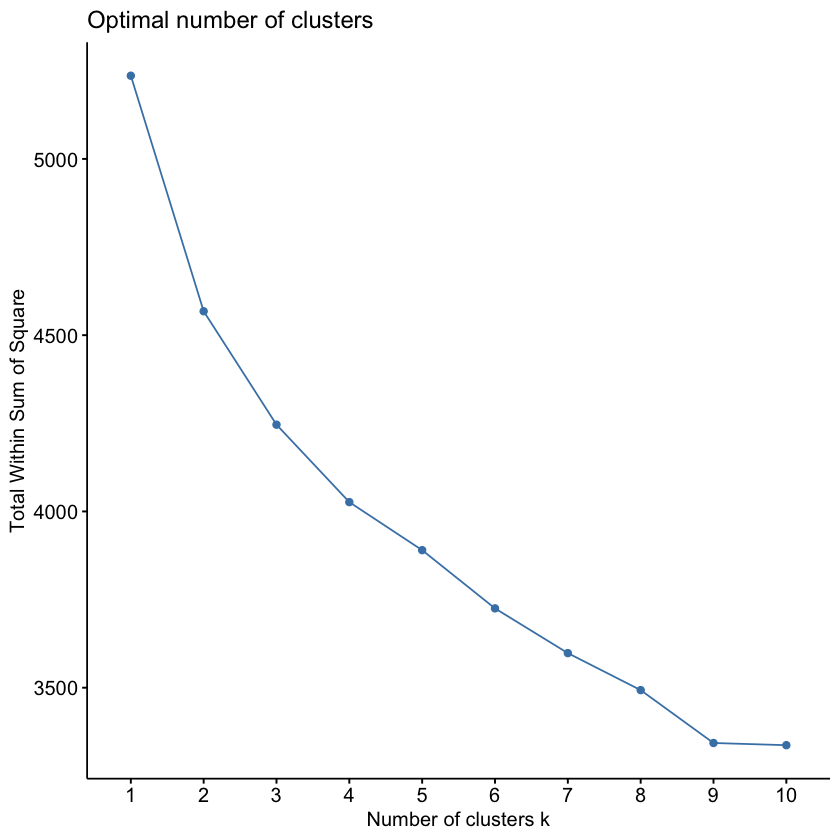

In [30]:
factoextra::fviz_nbclust(x=df_scaled,kmeans,method = c("wss")) 

K-Means: Silhouette Method

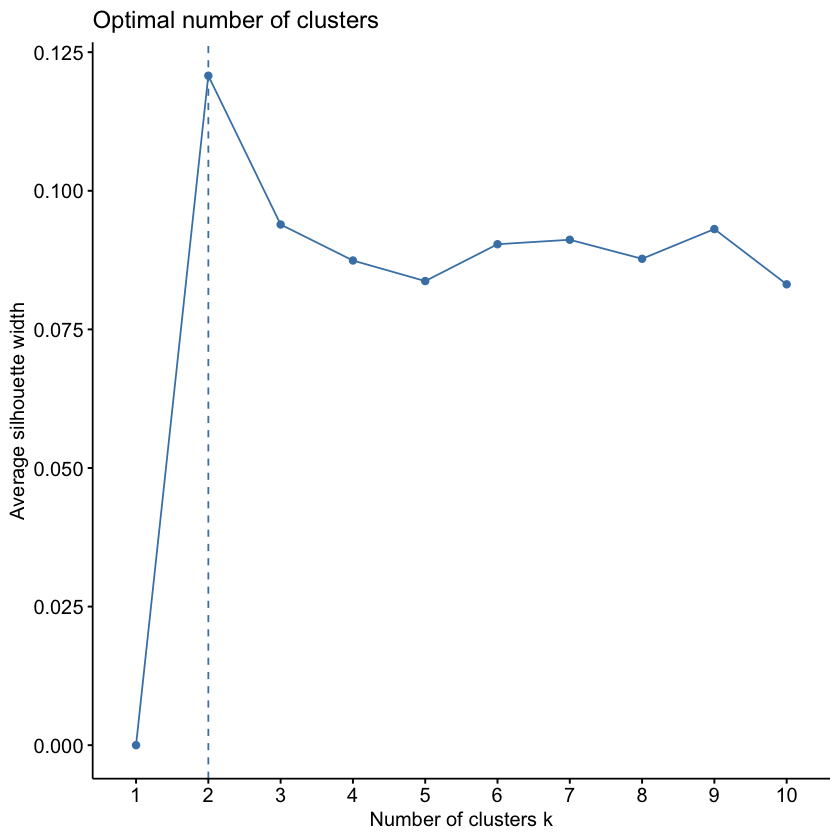

In [31]:
factoextra::fviz_nbclust(x=df_scaled,kmeans,method = c("silhouette"))

K-Means: K = 2

In [32]:
set.seed(127) #DO NOT FORGET THIS STEP!


km.res <-kmeans(df_scaled, 2, nstart = 25)


print(km.res)

K-means clustering with 2 clusters of sizes 216, 261

Cluster means:
         Age Honesty.Humility Emotionality Extraversion Agreeableness
1  0.5021094        0.6301649   -0.2546039    0.2647862     0.3616398
2 -0.4155388       -0.5215158    0.2107067   -0.2191334    -0.2992881
  Conscientiousness   Openness Avoidance.Similarity Phone.as.status.object
1         0.3568071  0.4408863            0.1998096             -0.6139771
2        -0.2952886 -0.3648714           -0.1653597              0.5081189
  Social.Economic.Status Time.owned.current.phone
1             0.05125975                0.1962206
2            -0.04242187               -0.1623894

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  19  20  21  22 
  2   1   1   2   1   2   2   1   1   1   1   2   2   1   2   2   1   1   1   1 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  1   2   1   1   1   2   1   2   2   1   2   2   2   1   2   2   2   2   2   2 
 4

In [33]:
aggregate(df_scaled, by=list(cluster=km.res$cluster), mean)

cluster Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 1        0.5021094  0.6301649       -0.2546039    0.2647862    0.3616398   
2 2       -0.4155388 -0.5215158        0.2107067   -0.2191334   -0.2992881   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1  0.3568071         0.4408863  0.1998096           -0.6139771            
2 -0.2952886        -0.3648714 -0.1653597            0.5081189            
  Social.Economic.Status Time.owned.current.phone
1  0.05125975             0.1962206              
2 -0.04242187            -0.1623894

In [34]:
df_fitted <-cbind(df_scaled, cluster = km.res$cluster)

head(df_fitted)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone cluster
1  0.0000000              0.7538505               2      
2  0.6920067             -1.1208275               1      
3 -2.7680267              1.2225200               1      
4 -1.3840134             -1.1208275               2      
5 -2.0760200             -0.8864928               1      
6  0.0000000              1.3396874               2

In [35]:
km.res$centers

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1  0.5021094  0.6301649       -0.2546039    0.2647862    0.3616398   
2 -0.4155388 -0.5215158        0.2107067   -0.2191334   -0.2992881   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1  0.3568071         0.4408863  0.1998096           -0.6139771            
2 -0.2952886        -0.3648714 -0.1653597            0.5081189            
  Social.Economic.Status Time.owned.current.phone
1  0.05125975             0.1962206              
2 -0.04242187            -0.1623894

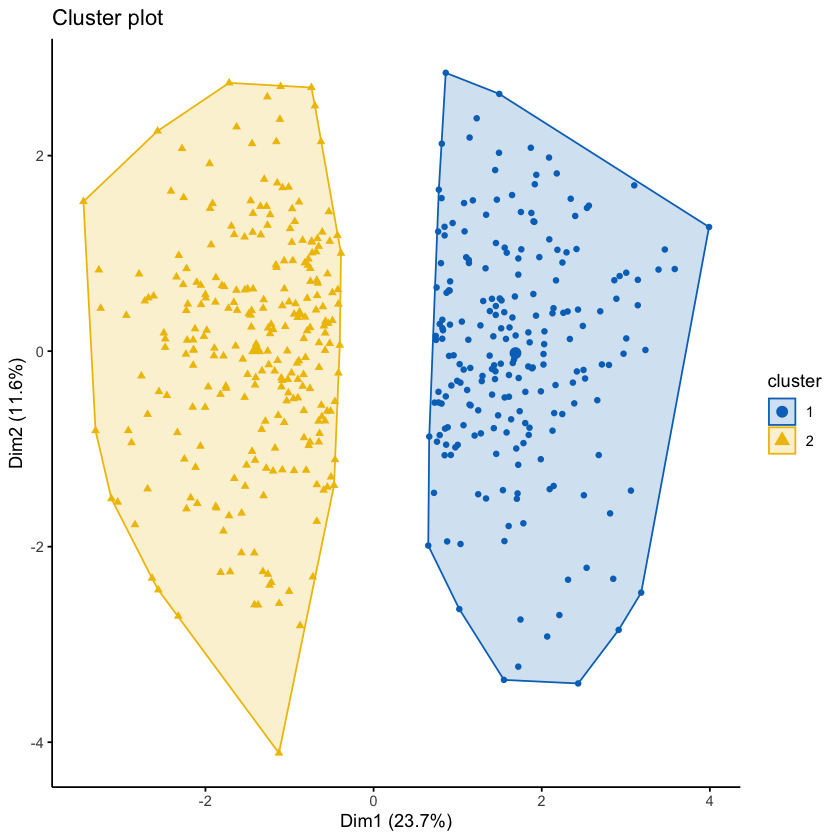

In [36]:
fviz_cluster(km.res, df_fitted, 

             ellipse.type = "convex",

             geom=c("point"), 

             palette = "jco", 

             ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  216          0.10
2       2  261          0.14


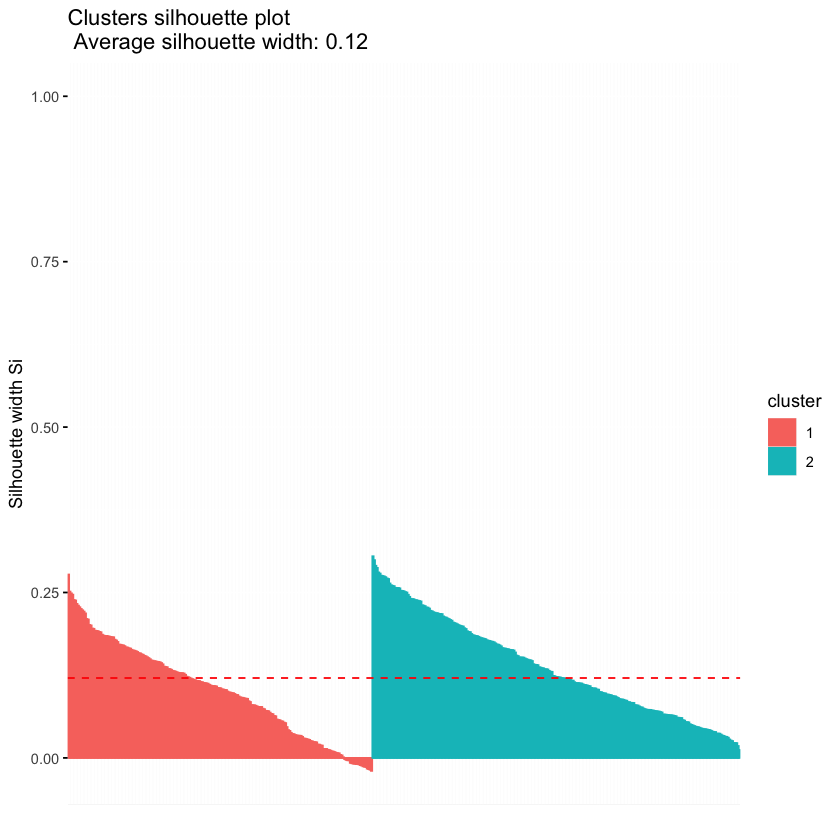

In [37]:
sil <- silhouette(km.res$cluster, dist(df_scaled))
fviz_silhouette(sil)

In [38]:
# Summary of silhouette analysis

si.sum <- summary(sil)

# Average silhouette width of each cluster

si.sum$clus.avg.widths

1         2 
0.1009917 0.1371164

In [39]:
# Silhouette width of observation

sil <- km.res$silinfo$widths[, 1:2]

# Objects with negative silhouette

neg_sil_index <- which(sil[, 'sil_width'] < 0)

sil[neg_sil_index, , drop = FALSE]

NULL

In [40]:
df_stats <- dist(df_scaled, method ="euclidean")

# Statistics for k-means clustering

km_stats <- cluster.stats(df_stats, km.res$cluster) #this is using the kmeans clustering we did for the silhouette


km_stats #this prints all the statistics

$n
[1] 477

$cluster.number
[1] 2

$cluster.size
[1] 216 261

$min.cluster.size
[1] 216

$noisen
[1] 0

$diameter
[1] 8.435597 8.295412

$average.distance
[1] 4.362784 4.192006

$median.distance
[1] 4.328300 4.150782

$separation
[1] 1.235722 1.235722

$average.toother
[1] 4.876189 4.876189

$separation.matrix
         [,1]     [,2]
[1,] 0.000000 1.235722
[2,] 1.235722 0.000000

$ave.between.matrix
         [,1]     [,2]
[1,] 0.000000 4.876189
[2,] 4.876189 0.000000

$average.between
[1] 4.876189

$average.within
[1] 4.269339

$n.between
[1] 56376

$n.within
[1] 57150

$max.diameter
[1] 8.435597

$min.separation
[1] 1.235722

$within.cluster.ss
[1] 4567.021

$clus.avg.silwidths
        1         2 
0.1009917 0.1371164 

$avg.silwidth
[1] 0.120758

$g2
NULL

$g3
NULL

$pearsongamma
[1] 0.2872319

$dunn
[1] 0.146489

$dunn2
[1] 1.117678

$entropy
[1] 0.6886906

$wb.ratio
[1] 0.8755483

$ch
[1] 69.5782

$cwidegap
[1] 3.305966 3.535002

$widestgap
[1] 3.535002

$sindex
[1] 1.700888

$corrected.rand
NULL

$vi
NULL

In [41]:
table(raw_gender_smartphone_breakdown$gender_dummy, km.res$cluster)
table(raw_gender_smartphone_breakdown$smartphone_dummy, km.res$cluster)

        
           1   2
  female 137 185
  male    79  76

         
            1   2
  Android 106  82
  iPhone  110 179

K-Means: K = 3

In [42]:
set.seed(127) #DO NOT FORGET THIS STEP!


km.res3 <-kmeans(df_scaled, 3, nstart = 25)


print(km.res3)

K-means clustering with 3 clusters of sizes 153, 159, 165

Cluster means:
         Age Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.5164751        0.1663256    0.7547778   -0.1411372     0.3803905
2  0.8279890        0.7397935   -0.4703509    0.3598997     0.2917459
3 -0.3189671       -0.8671211   -0.2466376   -0.2159398    -0.6338626
  Conscientiousness   Openness Avoidance.Similarity Phone.as.status.object
1         0.3522415 -0.2421591           -0.5041231              0.1831285
2         0.3307406  0.4370284            0.3500334             -0.6605683
3        -0.6453376 -0.1965890            0.1301546              0.4667376
  Social.Economic.Status Time.owned.current.phone
1            -0.04522919              -0.06938436
2             0.13491954               0.24907279
3            -0.08807358              -0.17567737

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  19  20  21  22 
  3   2   2   3   2   3   3   2   1   2   2  

In [43]:
km.res3$centers

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.5164751  0.1663256        0.7547778   -0.1411372    0.3803905   
2  0.8279890  0.7397935       -0.4703509    0.3598997    0.2917459   
3 -0.3189671 -0.8671211       -0.2466376   -0.2159398   -0.6338626   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1  0.3522415        -0.2421591 -0.5041231            0.1831285            
2  0.3307406         0.4370284  0.3500334           -0.6605683            
3 -0.6453376        -0.1965890  0.1301546            0.4667376            
  Social.Economic.Status Time.owned.current.phone
1 -0.04522919            -0.06938436             
2  0.13491954             0.24907279             
3 -0.08807358            -0.17567737

In [44]:
df_fitted3 <-cbind(df_scaled, cluster = km.res3$cluster)

head(df_fitted3)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone cluster
1  0.0000000              0.7538505               3      
2  0.6920067             -1.1208275               2      
3 -2.7680267              1.2225200               2      
4 -1.3840134             -1.1208275               3      
5 -2.0760200             -0.8864928               2      
6  0.0000000              1.3396874               3

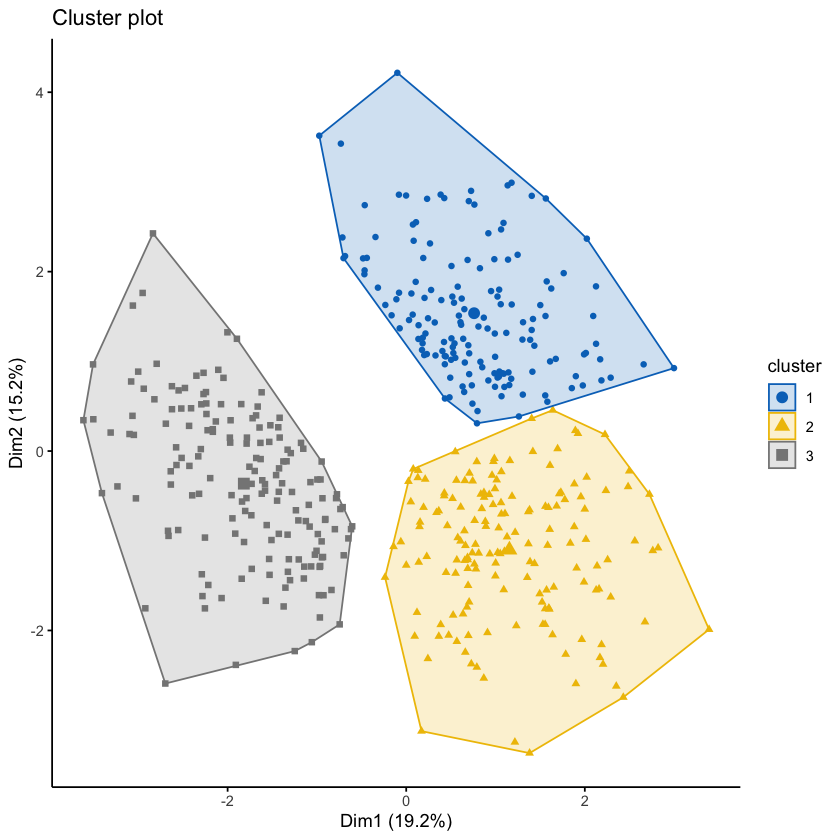

In [45]:
fviz_cluster(km.res3, df_fitted3, 

             ellipse.type = "convex",

             geom=c("point"), 

             palette = "jco", 

             ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  153          0.10
2       2  159          0.09
3       3  165          0.09


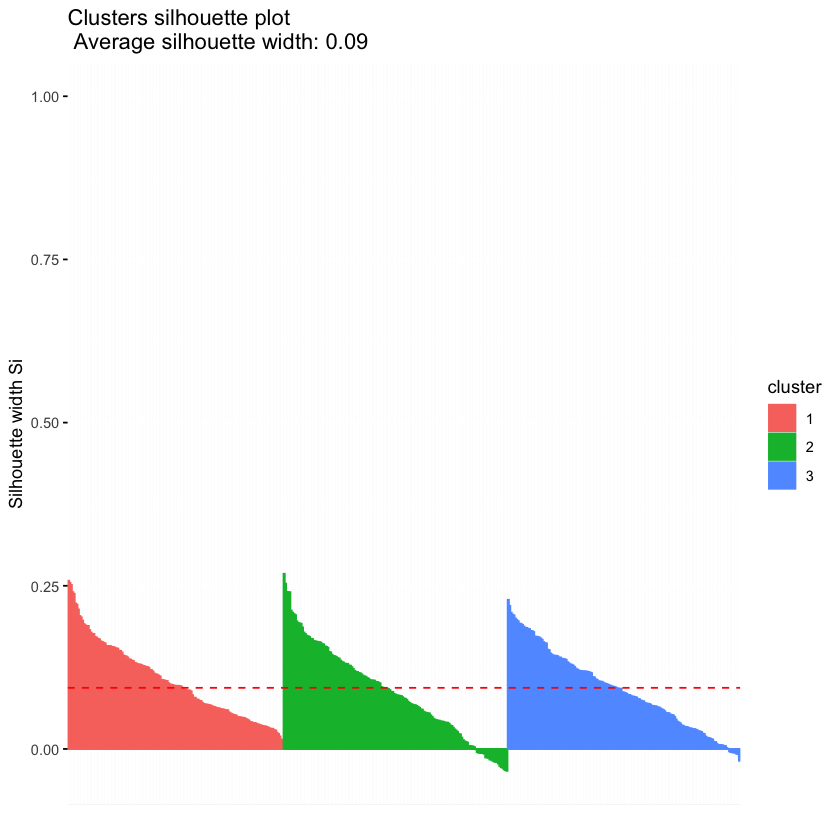

In [46]:
sil3 <- silhouette(km.res3$cluster, dist(df_scaled))
fviz_silhouette(sil3)

In [47]:
# Summary of silhouette analysis

si.sum3 <- summary(sil3)

# Average silhouette width of each cluster

si.sum3$clus.avg.widths

1          2          3 
0.10467945 0.08628104 0.09052951

In [48]:
# Silhouette width of observation

sil3 <- km.res3$silinfo$widths[, 1:2]

# Objects with negative silhouette

neg_sil_index <- which(sil3[, 'sil_width'] < 0)

sil3[neg_sil_index, , drop = FALSE]

NULL

In [49]:
table(raw_gender_smartphone_breakdown$gender_dummy, km.res3$cluster)
table(raw_gender_smartphone_breakdown$smartphone_dummy, km.res3$cluster)

        
           1   2   3
  female 125  95 102
  male    28  64  63

         
            1   2   3
  Android  46  82  60
  iPhone  107  77 105

K-Mean: K = 4

In [50]:
set.seed(127) #DO NOT FORGET THIS STEP!


km.res4 <-kmeans(df_scaled, 4, nstart = 25)


print(km.res4)

K-means clustering with 4 clusters of sizes 97, 145, 119, 116

Cluster means:
         Age Honesty.Humility Emotionality Extraversion Agreeableness
1  1.6530387        0.5744391   -0.5061424   0.25601115     0.1549188
2 -0.4062708       -0.9946978   -0.1419437  -0.27010731    -0.6787908
3 -0.3592672        0.6432829   -0.2000958   0.14666912     0.4961087
4 -0.5058853        0.1031029    0.8059401  -0.02690644     0.2100053
  Conscientiousness   Openness Avoidance.Similarity Phone.as.status.object
1         0.1632993  0.2608352            0.1829813             -0.4843530
2        -0.6516072 -0.1483049            0.1416837              0.4981406
3         0.2950663  0.5807266            0.2280838             -0.7138777
4         0.3752597 -0.6284763           -0.5640974              0.5146836
  Social.Economic.Status Time.owned.current.phone
1              0.2639613              0.297260082
2             -0.1622636             -0.180256328
3             -0.1977162              0.0055546

In [51]:
km.res4$centers

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1  1.6530387  0.5744391       -0.5061424    0.25601115   0.1549188   
2 -0.4062708 -0.9946978       -0.1419437   -0.27010731  -0.6787908   
3 -0.3592672  0.6432829       -0.2000958    0.14666912   0.4961087   
4 -0.5058853  0.1031029        0.8059401   -0.02690644   0.2100053   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1  0.1632993         0.2608352  0.1829813           -0.4843530            
2 -0.6516072        -0.1483049  0.1416837            0.4981406            
3  0.2950663         0.5807266  0.2280838           -0.7138777            
4  0.3752597        -0.6284763 -0.5640974            0.5146836            
  Social.Economic.Status Time.owned.current.phone
1  0.2639613              0.297260082            
2 -0.1622636             -0.180256328            
3 -0.1977162              0.005554629            
4  0.1849328             -0.028948803

In [52]:
df_fitted4 <-cbind(df_scaled, cluster = km.res4$cluster)

head(df_fitted4)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone cluster
1  0.0000000              0.7538505               3      
2  0.6920067             -1.1208275               1      
3 -2.7680267              1.2225200               3      
4 -1.3840134             -1.1208275               2      
5 -2.0760200             -0.8864928               1      
6  0.0000000              1.3396874               2

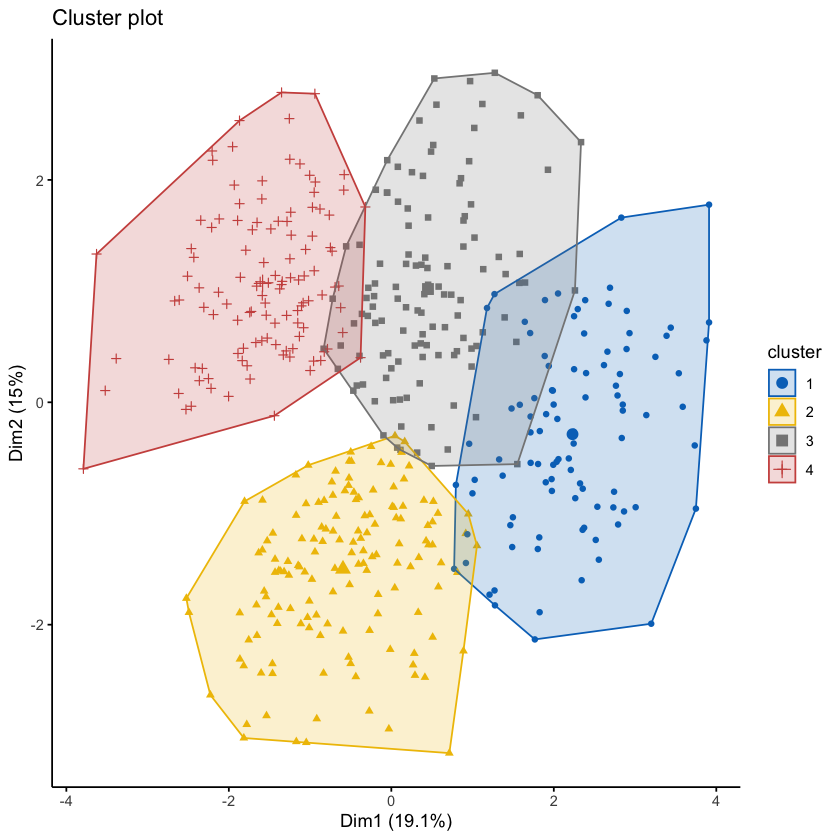

In [53]:
fviz_cluster(km.res4, df_fitted4, 

             ellipse.type = "convex",

             geom=c("point"), 

             palette = "jco", 

             ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   97          0.07
2       2  145          0.08
3       3  119          0.09
4       4  116          0.10


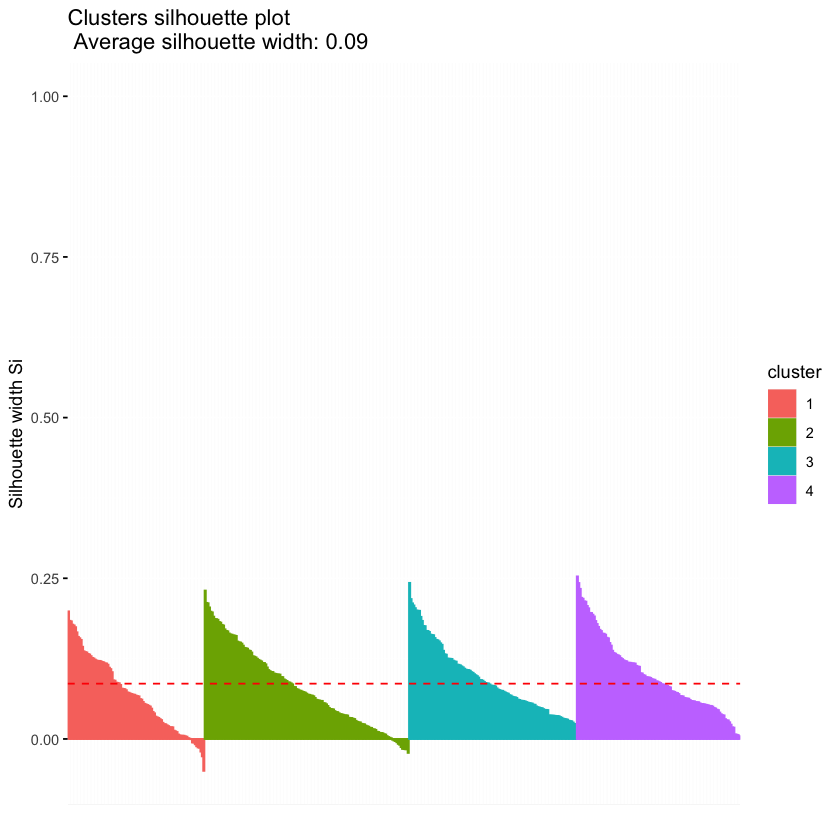

In [54]:
sil4 <- silhouette(km.res4$cluster, dist(df_scaled))
fviz_silhouette(sil4)

In [55]:
# Summary of silhouette analysis

si.sum4 <- summary(sil4)

# Average silhouette width of each cluster

si.sum4$clus.avg.widths

1          2          3          4 
0.06940669 0.07959046 0.09402767 0.09983120

In [56]:
# Silhouette width of observation

sil4 <- km.res4$silinfo$widths[, 1:4]

# Objects with negative silhouette

neg_sil_index <- which(sil4[, 'sil_width'] < 0)

sil4[neg_sil_index, , drop = FALSE]

NULL

K-Medoids (PAM)

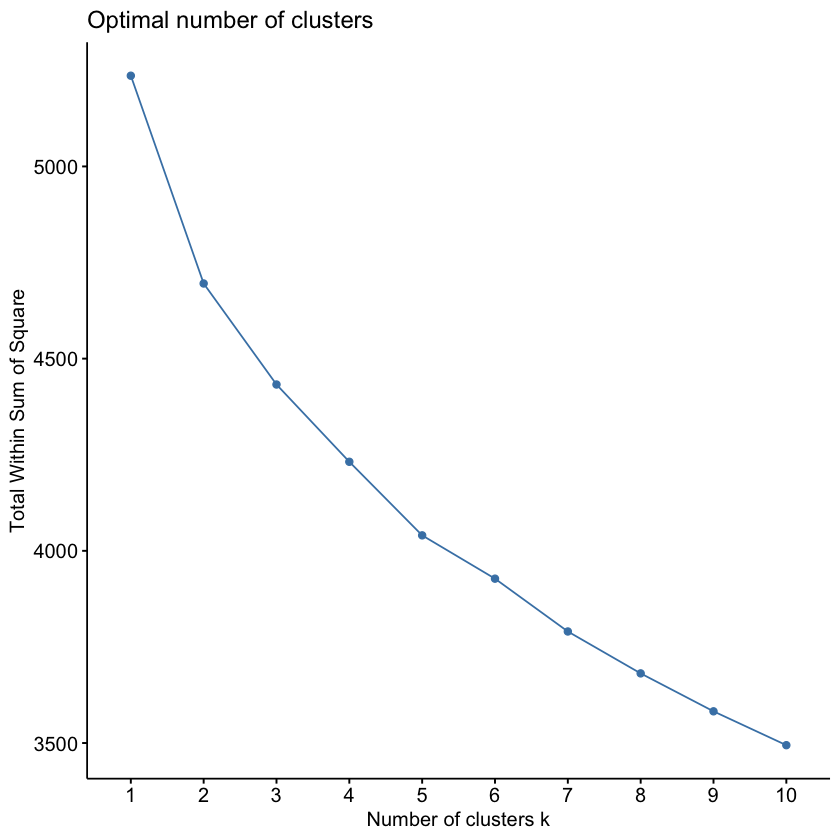

In [57]:
factoextra::fviz_nbclust(x=df_scaled,FUNcluster=pam, method = c( "wss"))

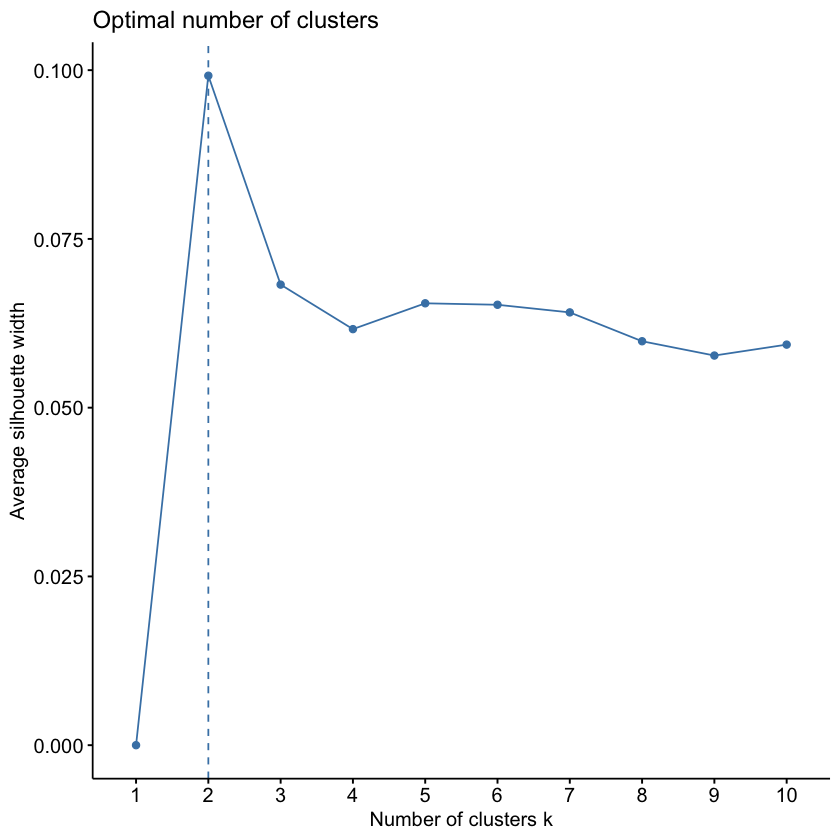

In [58]:
factoextra::fviz_nbclust(x=df_scaled, FUNcluster=pam, method = c( "silhouette"))

In [59]:
pam.res <-pam(df_scaled, 2)

print(pam.res)

Medoids:
     ID        Age Honesty.Humility Emotionality Extraversion Agreeableness
65   61  0.4662569        1.0269126   -0.2891578   0.07258482     0.5423960
282 262 -0.6649086       -0.4147276    0.6064804  -0.24799814    -0.2676319
    Conscientiousness   Openness Avoidance.Similarity Phone.as.status.object
65         0.01775788 -0.5631276            0.1664964             -0.8146649
282        0.01775788  0.4256277            0.5662552              0.3847029
    Social.Economic.Status Time.owned.current.phone
65                       0                0.4023483
282                      0               -0.6521580
Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  19  20  21  22 
  1   1   1   2   1   2   2   1   1   2   1   2   2   1   2   1   1   1   1   1 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  1   2   1   1   1   2   2   2   2   1   2   2   2   1   2   2   2   2   2   2 
 43  44  45  46  47  48  49  50  

In [60]:
df_PAM <-cbind(df_scaled, cluster = pam.res$cluster)

head(df_PAM)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone cluster
1  0.0000000              0.7538505               1      
2  0.6920067             -1.1208275               1      
3 -2.7680267              1.2225200               1      
4 -1.3840134             -1.1208275               2      
5 -2.0760200             -0.8864928               1      
6  0.0000000              1.3396874               2

In [61]:
pam.res$medoids

Age        Honesty.Humility Emotionality Extraversion Agreeableness
65   0.4662569  1.0269126       -0.2891578    0.07258482   0.5423960   
282 -0.6649086 -0.4147276        0.6064804   -0.24799814  -0.2676319   
    Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
65  0.01775788        -0.5631276 0.1664964            -0.8146649            
282 0.01775788         0.4256277 0.5662552             0.3847029            
    Social.Economic.Status Time.owned.current.phone
65  0                       0.4023483              
282 0                      -0.6521580

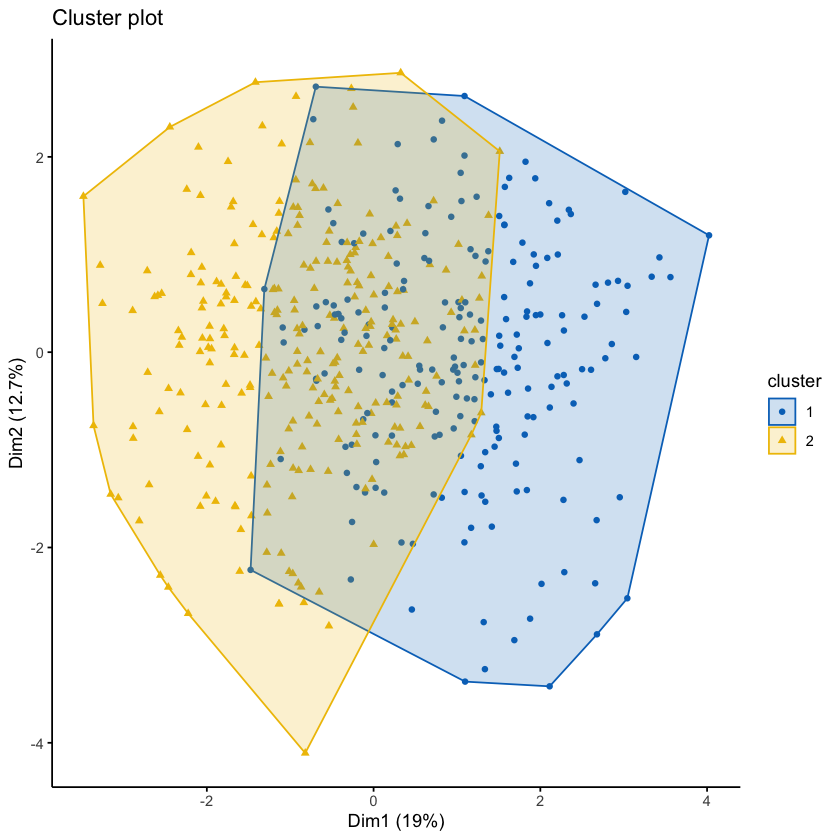

In [62]:
fviz_cluster(pam.res, df_PAM, 

             ellipse.type = "convex",

             geom=c("point"), 

             palette = "jco", 

             ggtheme = theme_classic()) 

CLARA

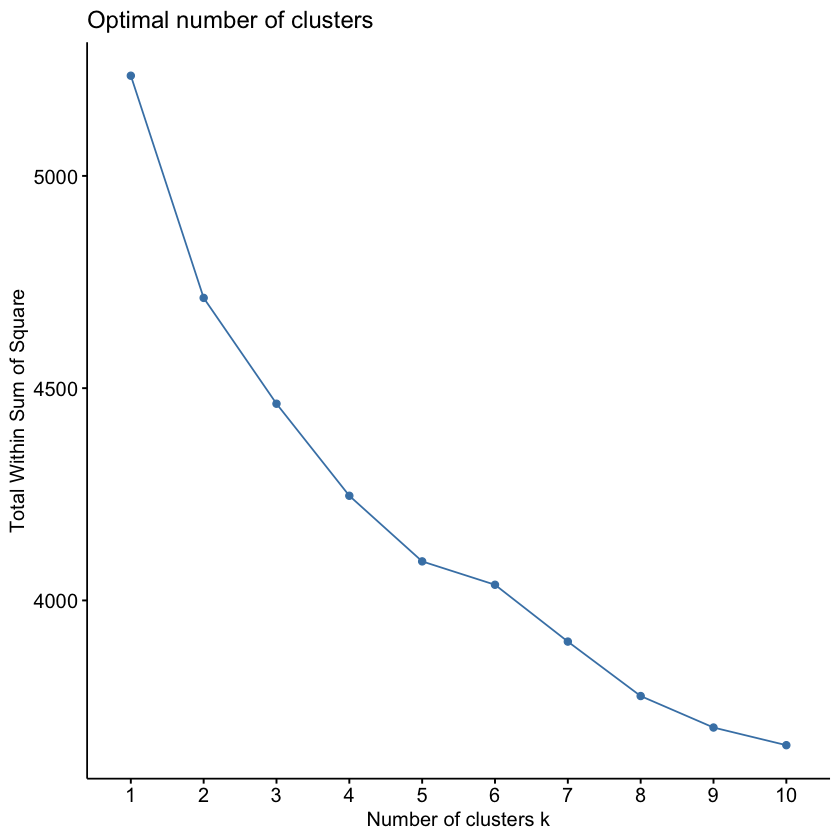

In [63]:
factoextra::fviz_nbclust(x=df_scaled,clara,method = c("wss"))

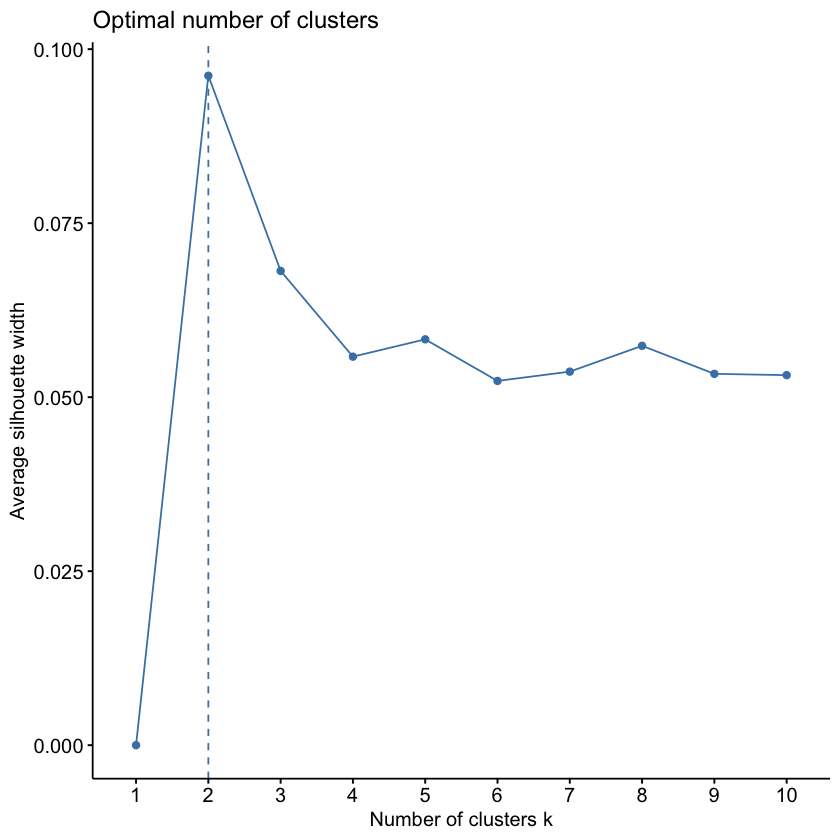

In [64]:
factoextra::fviz_nbclust(x=df_scaled,clara,method = c("silhouette"))

In [65]:
clara.res <-clara(df_scaled, 2, samples = 100, pamLike = T)

print(clara.res)

Call:	 clara(x = df_scaled, k = 2, samples = 100, pamLike = T) 
Medoids:
           Age Honesty.Humility Emotionality Extraversion Agreeableness
65   0.4662569        1.0269126   -0.2891578   0.07258482     0.5423960
282 -0.6649086       -0.4147276    0.6064804  -0.24799814    -0.2676319
    Conscientiousness   Openness Avoidance.Similarity Phone.as.status.object
65         0.01775788 -0.5631276            0.1664964             -0.8146649
282        0.01775788  0.4256277            0.5662552              0.3847029
    Social.Economic.Status Time.owned.current.phone
65                       0                0.4023483
282                      0               -0.6521580
Objective function:	 3.167937
Clustering vector: 	 Named int [1:477] 1 1 1 2 1 2 2 1 1 2 1 2 2 1 2 1 1 1 ...
 - attr(*, "names")= chr [1:477] "1" "2" "3" "4" "5" "6" "7" ...
Cluster sizes:	    	 212 265 
Best sample:
 [1] 14  16  27  36  65  81  129 137 148 158 162 170 202 208 213 243 246 252 264
[20] 272 282 317 348 354 3

In [66]:
df_clara <-cbind(df_scaled, cluster = clara.res$cluster)

head(df_clara)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone cluster
1  0.0000000              0.7538505               1      
2  0.6920067             -1.1208275               1      
3 -2.7680267              1.2225200               1      
4 -1.3840134             -1.1208275               2      
5 -2.0760200             -0.8864928               1      
6  0.0000000              1.3396874               2

In [67]:
clara.res$medoids

Age        Honesty.Humility Emotionality Extraversion Agreeableness
65   0.4662569  1.0269126       -0.2891578    0.07258482   0.5423960   
282 -0.6649086 -0.4147276        0.6064804   -0.24799814  -0.2676319   
    Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
65  0.01775788        -0.5631276 0.1664964            -0.8146649            
282 0.01775788         0.4256277 0.5662552             0.3847029            
    Social.Economic.Status Time.owned.current.phone
65  0                       0.4023483              
282 0                      -0.6521580

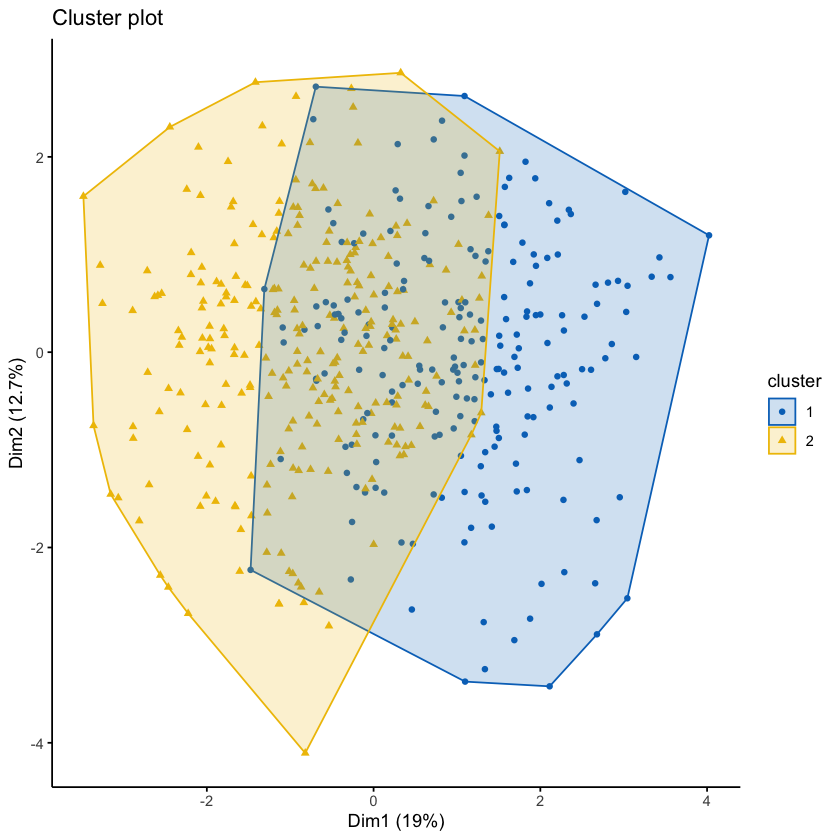

In [68]:
fviz_cluster(clara.res, df_clara, 

             ellipse.type = "convex",

             geom=c("point"), 

             palette = "jco", 

             ggtheme = theme_classic())

# **Hierarchical Clustering** # 

Agglomerative

In [69]:
head(df_scaled)

Age        Honesty.Humility Emotionality Extraversion Agreeableness
1 -0.3168577 -0.25454538      -1.4833421    0.07258482   0.3803905   
2  0.9883333  0.06581912      -1.1847961    1.67549961   1.3524239   
3  0.2922314  0.70654812      -1.4833421   -0.88916405   1.5144295   
4 -0.4908831 -0.73509213      -0.5877039   -0.72887257  -1.2396653   
5  1.3363842  0.22600137      -2.3789804   -2.01120440  -0.9156542   
6 -0.4038704 -1.37582113       0.9050265   -0.40828962  -1.2396653   
  Conscientiousness Openness   Avoidance.Similarity Phone.as.status.object
1 -0.8645869        -0.2335425 -1.8322979           -0.8146649            
2 -0.6881180         1.7439680 -1.8322979           -0.4719884            
3  0.1942269         2.4031382  0.8327611           -1.6713562            
4 -2.4528076        -1.5518828 -0.4997684            0.7273794            
5  0.5471648        -0.5631276  0.8327611           -1.8426945            
6  0.5471648         0.5904202 -0.4997684           -0.9860032            
  Social.Economic.Status Time.owned.current.phone
1  0.0000000              0.7538505              
2  0.6920067             -1.1208275              
3 -2.7680267              1.2225200              
4 -1.3840134             -1.1208275              
5 -2.0760200             -0.8864928              
6  0.0000000              1.3396874

Euclidean Distance

In [70]:
res.dist <-dist(df_scaled, method = "euclidean")
as.matrix(res.dist)[1:10, 1:10] 

1        2        3        4        5        6        7        8       
1  0.000000 3.669043 5.224648 4.263122 5.200947 3.826893 5.274694 4.722426
2  3.669043 0.000000 5.899588 6.098092 6.622364 5.556480 5.463307 4.929158
3  5.224648 5.899588 0.000000 6.977809 4.813221 5.627873 7.111733 4.644730
4  4.263122 6.098092 6.977809 0.000000 5.302151 5.219552 5.171648 7.229816
5  5.200947 6.622364 4.813221 5.302151 0.000000 5.670918 6.762462 5.856670
6  3.826893 5.556480 5.627873 5.219552 5.670918 0.000000 4.035963 5.130733
7  5.274694 5.463307 7.111733 5.171648 6.762462 4.035963 0.000000 6.421368
8  4.722426 4.929158 4.644730 7.229816 5.856670 5.130733 6.421368 0.000000
9  4.288193 4.994536 5.116334 5.448706 6.168686 4.462993 5.584998 3.491847
10 5.081266 3.566844 6.290161 6.798624 6.468768 5.550641 4.398367 4.725346
   9        10      
1  4.288193 5.081266
2  4.994536 3.566844
3  5.116334 6.290161
4  5.448706 6.798624
5  6.168686 6.468768
6  4.462993 5.550641
7  5.584998 4.398367
8  3.491847 4.725346
9  0.000000 4.829624
10 4.829624 0.000000

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


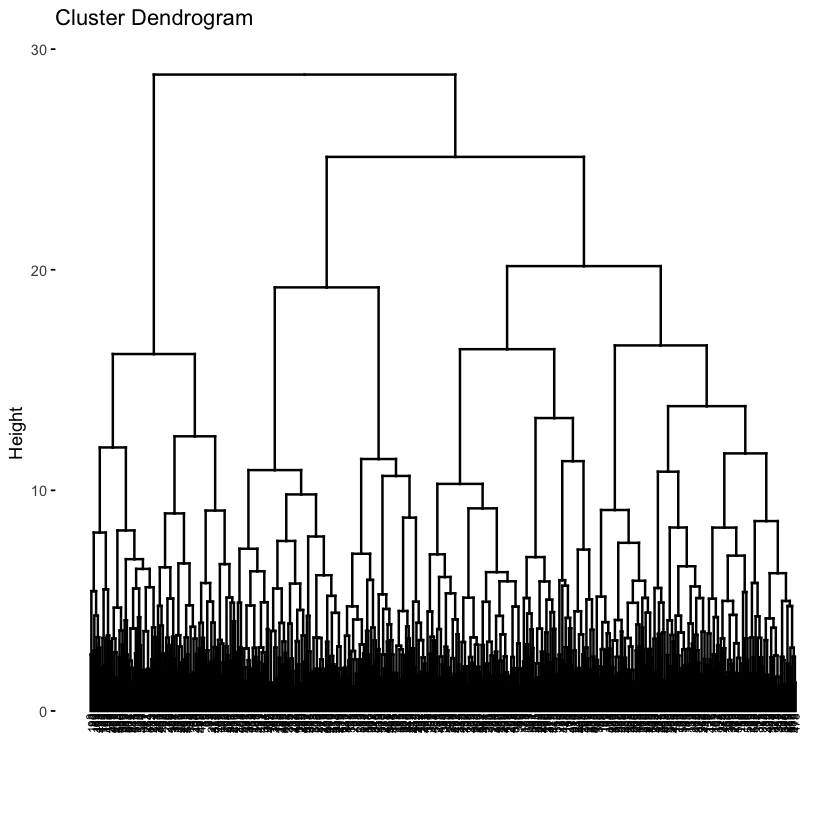

In [71]:
#compute 

res.hc <-hclust(d = res.dist, method = "ward.D2")


#plot denrogram

fviz_dend(res.hc, cex = 0.5)

In [72]:
# Compute cophentic distance

res.coph <-cophenetic(res.hc)


# Correlation between cophenetic distance and the original distance

cor(res.dist, res.coph)

[1] 0.3347591

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


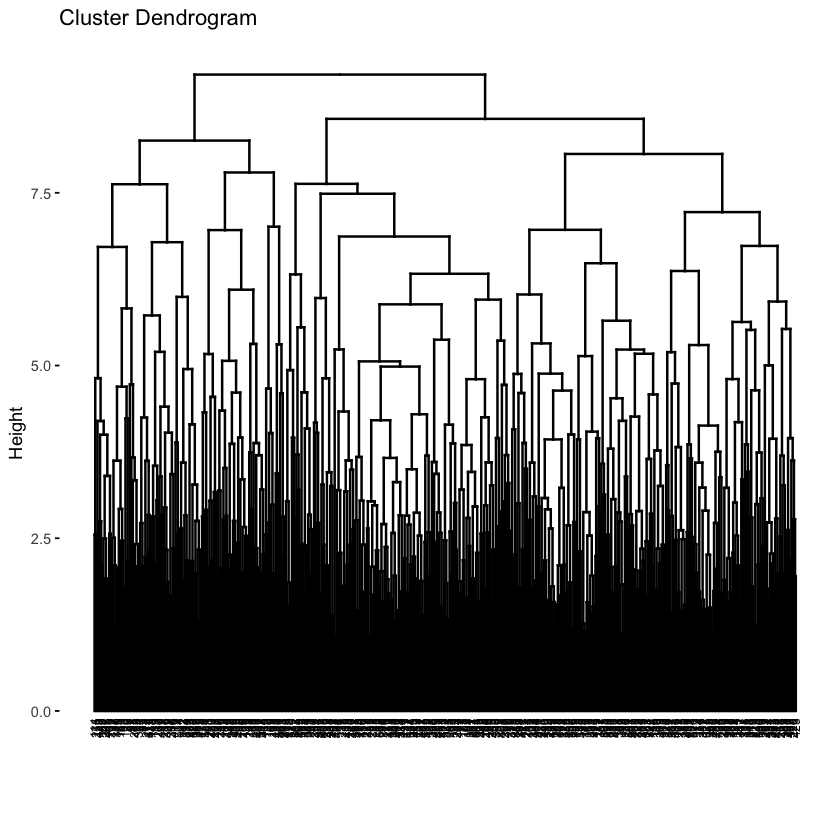

In [73]:
#compute 

res.hc <-hclust(d = res.dist, method = "complete")


#plot denrogram

fviz_dend(res.hc, cex = 0.5)

In [74]:
# Compute cophentic distance

res.coph <-cophenetic(res.hc)


# Correlation between cophenetic distance and the original distance

cor(res.dist, res.coph)

[1] 0.3005605

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


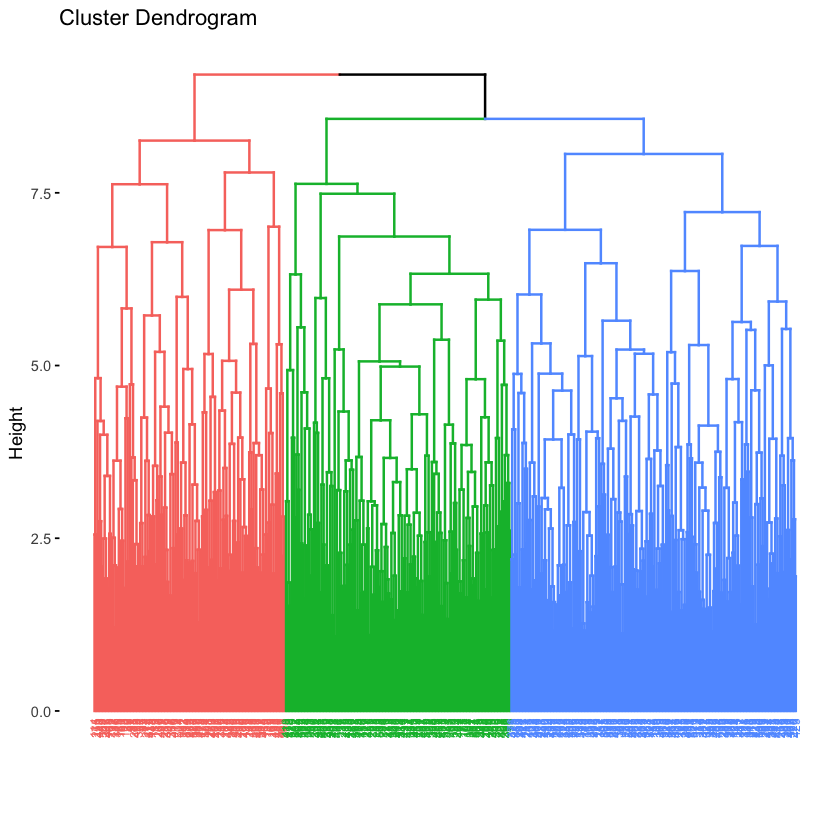

In [75]:
cut_avg <-cutree(res.hc, k = 3)


#coloring by k

fviz_dend(res.hc, cex = 0.5, k = 3, color_labels_by_k = TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


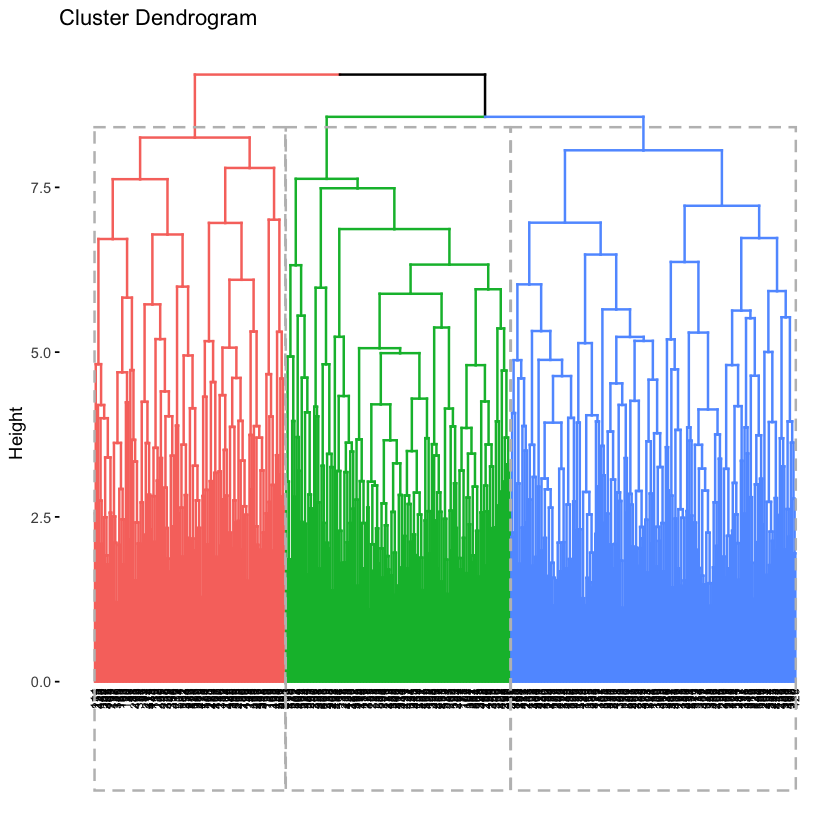

In [76]:
#coloring by k and adding boxes

fviz_dend(res.hc, cex = 0.5, k = 3, color_labels_by_k = FALSE, rect = TRUE)

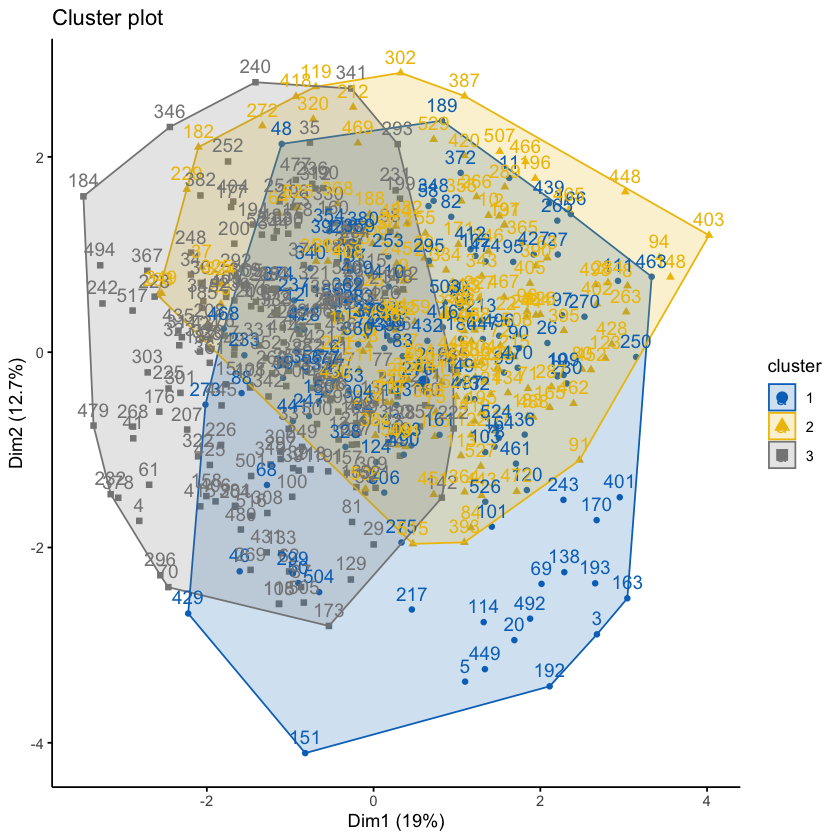

In [77]:
#cluster plots can be done, too -- need to use the cutree() beforehand

cut_avg <-cutree(res.hc, k = 3)


fviz_cluster(list(data = df_scaled, cluster=cut_avg), 

             palette = "jco", 

             ggtheme = theme_classic())

Manhattan Distance

In [78]:
res.dist2 <-dist(df_scaled, method = "manhattan")
as.matrix(res.dist2)[1:10, 1:10] 

1        2         3        4        5        6        7        8        
1   0.00000  9.562390 14.11991 13.01155 15.56005 10.02301 15.13150 11.783581
2   9.56239  0.000000 15.57137 17.54214 18.23770 16.98744 15.00960 13.460405
3  14.11991 15.571369  0.00000 20.09546 12.26402 15.47054 18.92623 11.597244
4  13.01155 17.542139 20.09546  0.00000 15.00365 13.24124 13.73749 20.637342
5  15.56005 18.237704 12.26402 15.00365  0.00000 16.19798 19.05637 17.538188
6  10.02301 16.987441 15.47054 13.24124 16.19798  0.00000 11.69987 12.834693
7  15.13150 15.009604 18.92623 13.73749 19.05637 11.69987  0.00000 16.029716
8  11.78358 13.460405 11.59724 20.63734 17.53819 12.83469 16.02972  0.000000
9  11.16810 15.616803 13.79637 15.02087 17.86062 10.56518 14.49099  9.331412
10 14.85240  9.738147 16.92087 18.04315 18.00587 16.47928 11.36171 13.343759
   9         10       
1  11.168097 14.852403
2  15.616803  9.738147
3  13.796366 16.920866
4  15.020874 18.043148
5  17.860624 18.005871
6  10.565179 16.479282
7  14.490994 11.361714
8   9.331412 13.343759
9   0.000000 12.779268
10 12.779268  0.000000

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


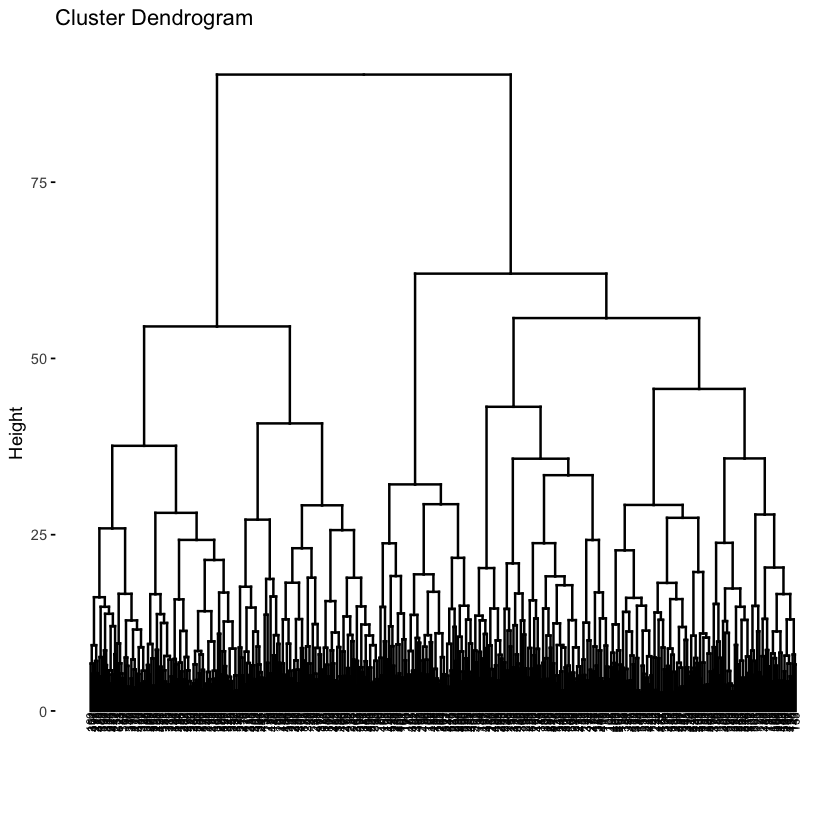

In [79]:
#compute 

res.hc2 <-hclust(d = res.dist2, method = "ward.D2")


#plot denrogram

fviz_dend(res.hc2, cex = 0.5)

In [80]:
# Compute cophentic distance

res.coph2 <-cophenetic(res.hc2)


# Correlation between cophenetic distance and the original distance

cor(res.dist2, res.coph2)

[1] 0.2724282

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


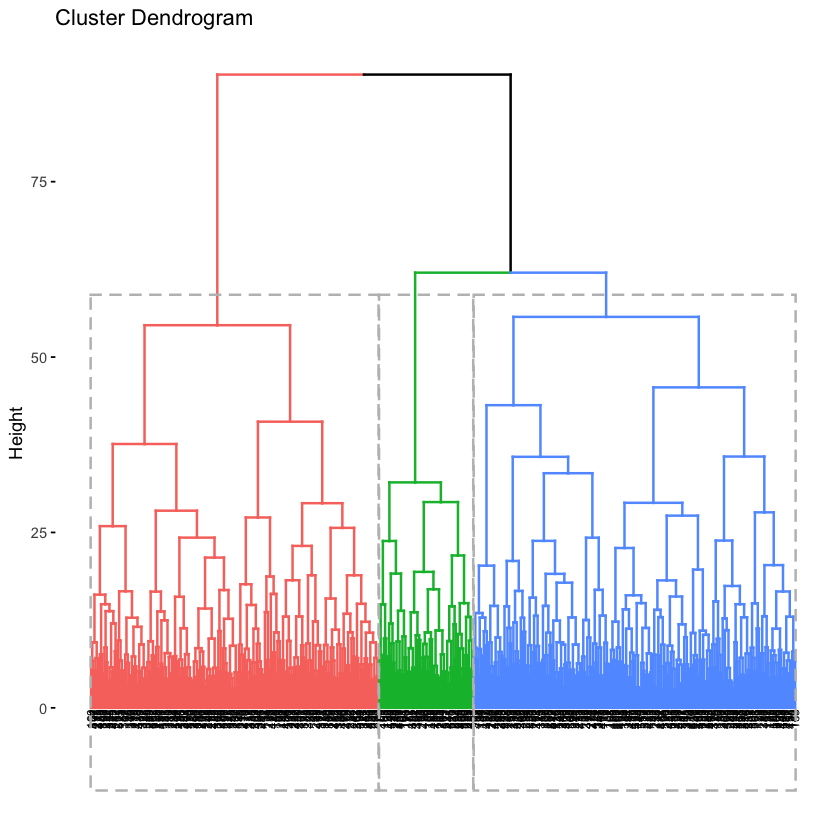

In [81]:
#coloring by k and adding boxes

fviz_dend(res.hc2, cex = 0.5, k = 3, color_labels_by_k = FALSE, rect = TRUE)

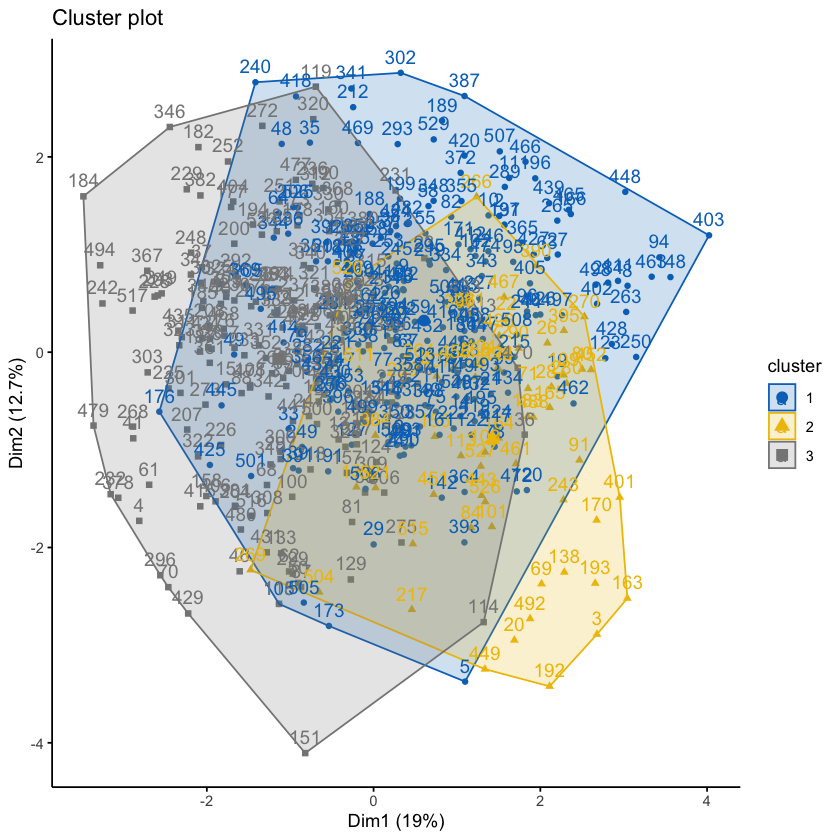

In [82]:
#cluster plots can be done, too -- need to use the cutree() beforehand

cut_avg2 <-cutree(res.hc2, k = 3)


fviz_cluster(list(data = df_dummy, cluster=cut_avg2), 

             palette = "jco", 

             ggtheme = theme_classic())

Density-Based Clustering

In [85]:
df <- subset(df_scaled, select = c("Honesty.Humility","Phone.as.status.object"))

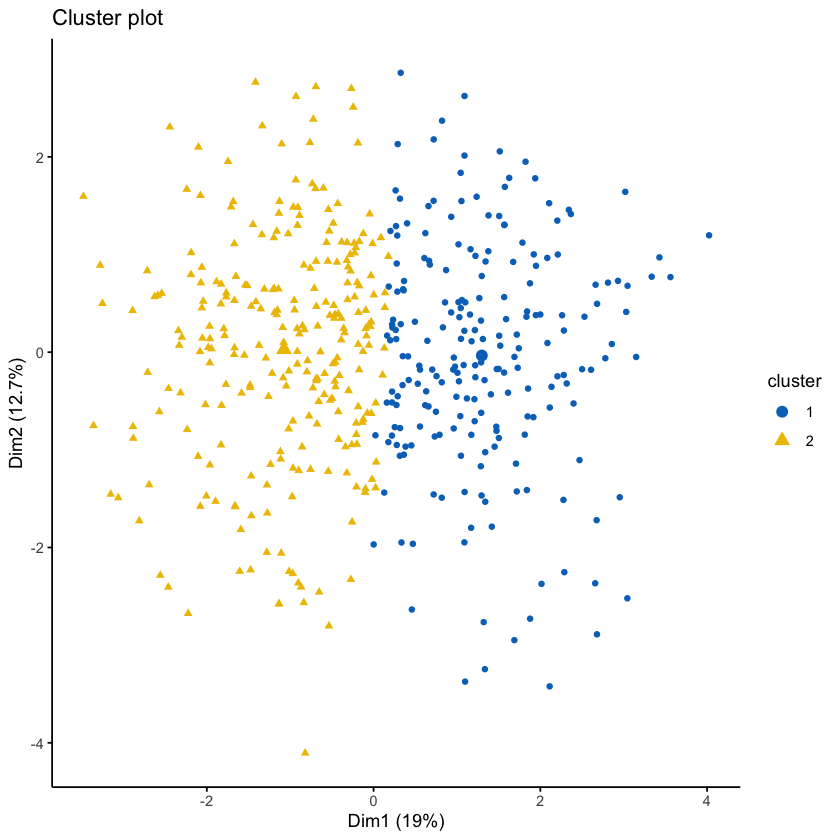

In [86]:
set.seed(127)


km.res <- kmeans(df_scaled, 2, nstart = 25)

fviz_cluster(km.res, df_scaled,ellipse.type = "point",

             geom=c("point"),

             palette = "jco",

             ggtheme = theme_classic())

integer(0)

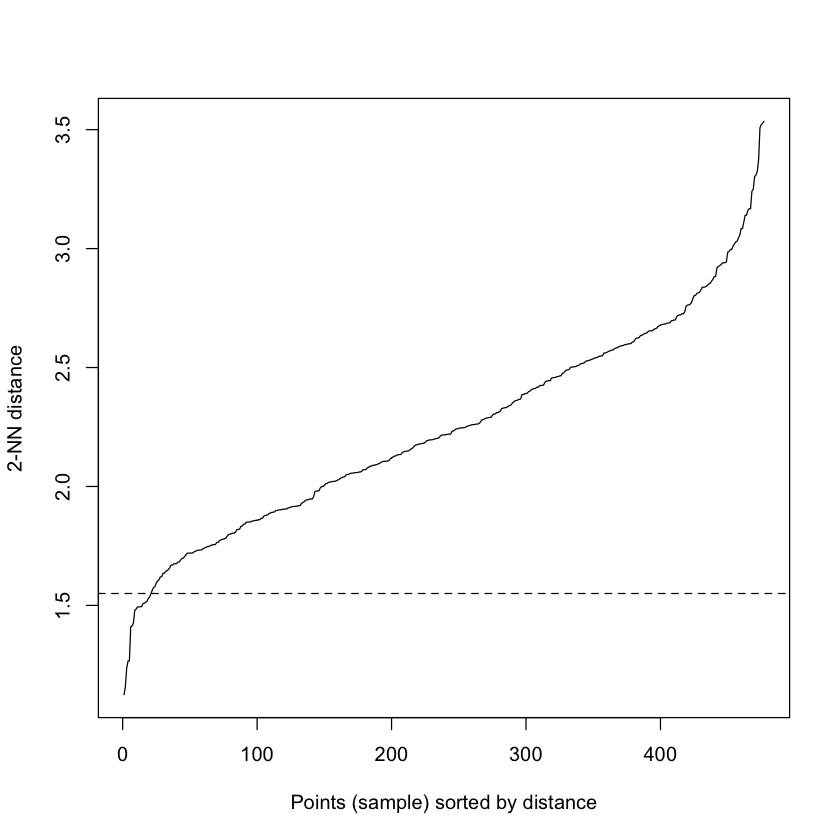

In [87]:
dbscan::kNNdistplot(df_scaled, k = 2)


#so we can see that the knee is around 0.15 (as seen on the dotted line)

dbscan::kNNdistplot(df_scaled, k = 2) +

  abline(h = 1.55, lty = 2)

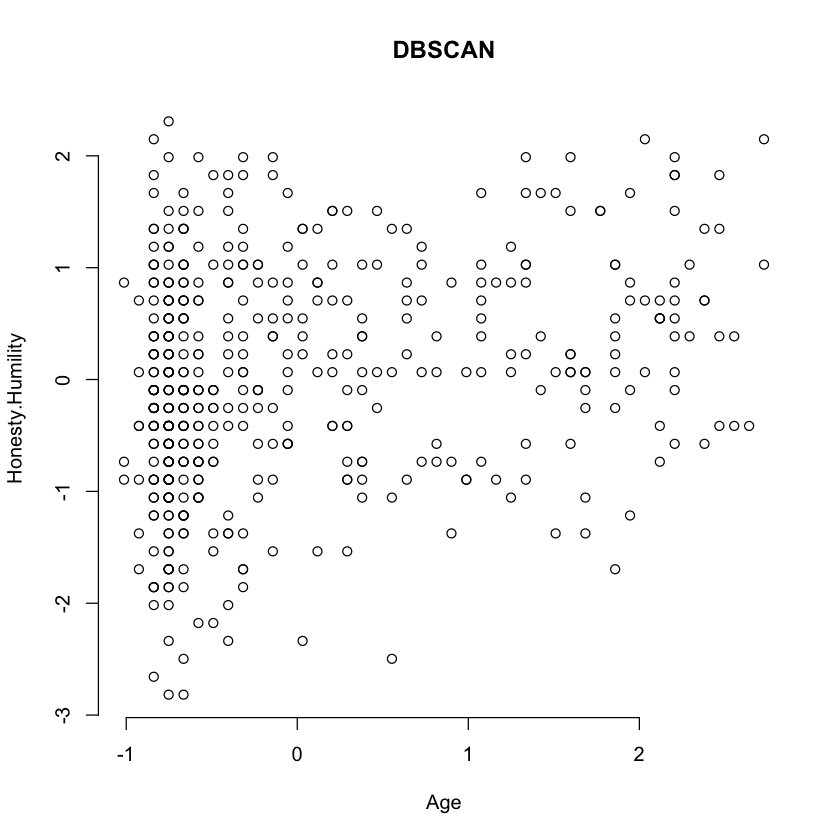

In [88]:
# Compute DBSCAN using fpc package

set.seed(127)


dbb <- fpc::dbscan(df_scaled, eps = 0.1, MinPts = 3)


# Plot DBSCAN results

plot(dbb, df_scaled, main = "DBSCAN", frame = FALSE)

In [89]:
print(dbb)

dbscan Pts=477 MinPts=3 eps=0.1

  0 
477 


## Soft Clustering ##

In [104]:
library("cluster")

res.fanny <- fanny(df_scaled, 2, stand = TRUE)


head(res.fanny$membership, 20)

Warning message in fanny(df_scaled, 2, stand = TRUE):
“the memberships are all very close to 1/k. Maybe decrease 'memb.exp' ?”


[,1] [,2]
1  0.5  0.5 
2  0.5  0.5 
3  0.5  0.5 
4  0.5  0.5 
5  0.5  0.5 
6  0.5  0.5 
7  0.5  0.5 
8  0.5  0.5 
9  0.5  0.5 
10 0.5  0.5 
11 0.5  0.5 
12 0.5  0.5 
13 0.5  0.5 
14 0.5  0.5 
15 0.5  0.5 
16 0.5  0.5 
19 0.5  0.5 
20 0.5  0.5 
21 0.5  0.5 
22 0.5  0.5

In [100]:
res.fanny$coeff

dunn_coeff    normalized 
 5.000000e-01 -9.103829e-15

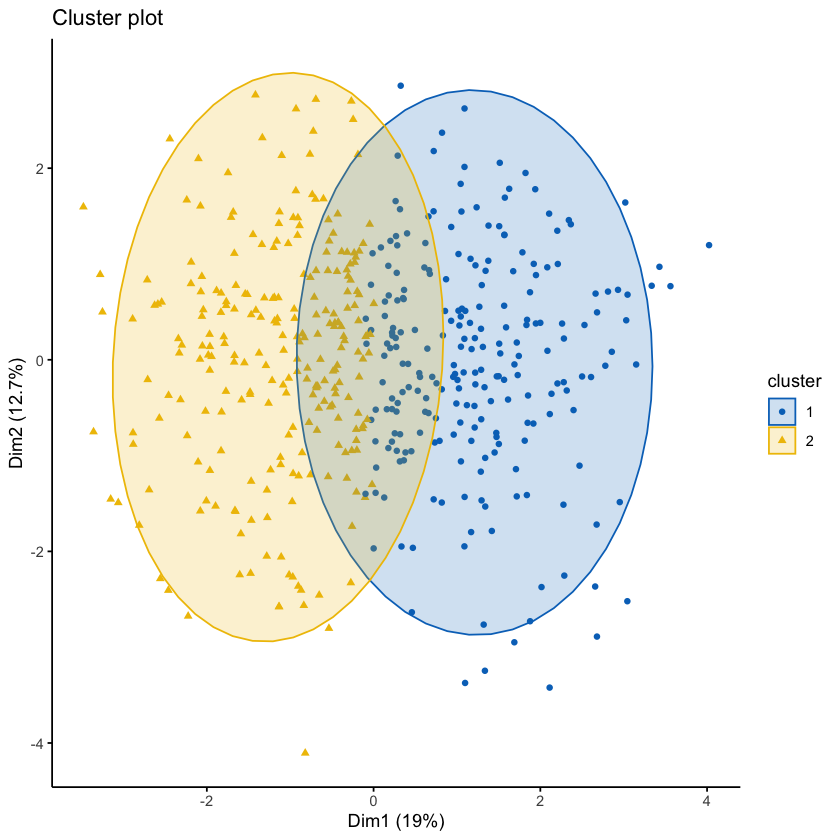

In [101]:
fviz_cluster(res.fanny, df_scaled,ellipse.type = "norm",

             geom=c("point"),

             palette = "jco",

             ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  232          0.09
2       2  245          0.14


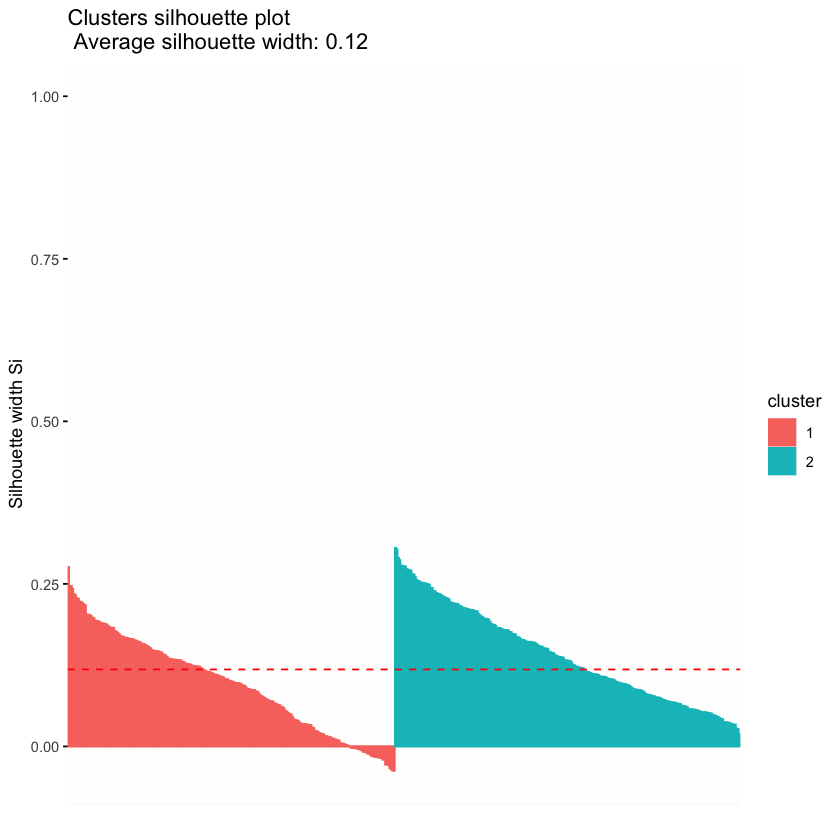

In [102]:
sil.fanny <- silhouette(res.fanny$cluster, dist(df_scaled))
fviz_silhouette(sil.fanny)

In [103]:
table(raw_gender_smartphone_breakdown$gender_dummy, res.fanny$cluster)
table(raw_gender_smartphone_breakdown$smartphone_dummy, res.fanny$cluster)

        
           1   2
  female 146 176
  male    86  69

         
            1   2
  Android 113  75
  iPhone  119 170